In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('Housing_data_train.csv')

In [5]:
# check the top 10 rays of database
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
8         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  
7      1   2006        WD         Normal     155000  
8      4   2007        WD         Normal     140000  
9     10   2008       COD        Abnorml     118500  

[10 rows x 81 columns]

In [6]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [16]:
# Let's explore the categorical columns
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# Let's check the total numbers of raws and column
df.shape

(1168, 81)

As we can see that the data has 1168 rows and 68 columns

In [10]:
# check the no. of unique values in dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [15]:
df.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False         True    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False         True    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1163  False       False     False         True    False   False   True   
1164  False       False     False        False    False   False   True   
1165  False       False     False        False    False   False   True   
1166  False       False     False        False    False   False  False   
1167  False       False     False         True    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True  False   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1163     False        False      False  ...     False    True  False   
1164     False        False      False  ...     False    True  False   
1165     False        False      False  ...     False    True   True   
1166     False        False      False  ...     False    True  False   
1167     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1163         True    False   False   False     False          False      False  
1164         True    False   False   False     False          False      False  
1165         True    False   False   False     False          False      False  
1166         True    False   False   False     False          False      False  
1167         True    False   False   False     False          False      False  

[1168 rows x 81 columns]

In [17]:
df.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
dtype: int64

<AxesSubplot:>

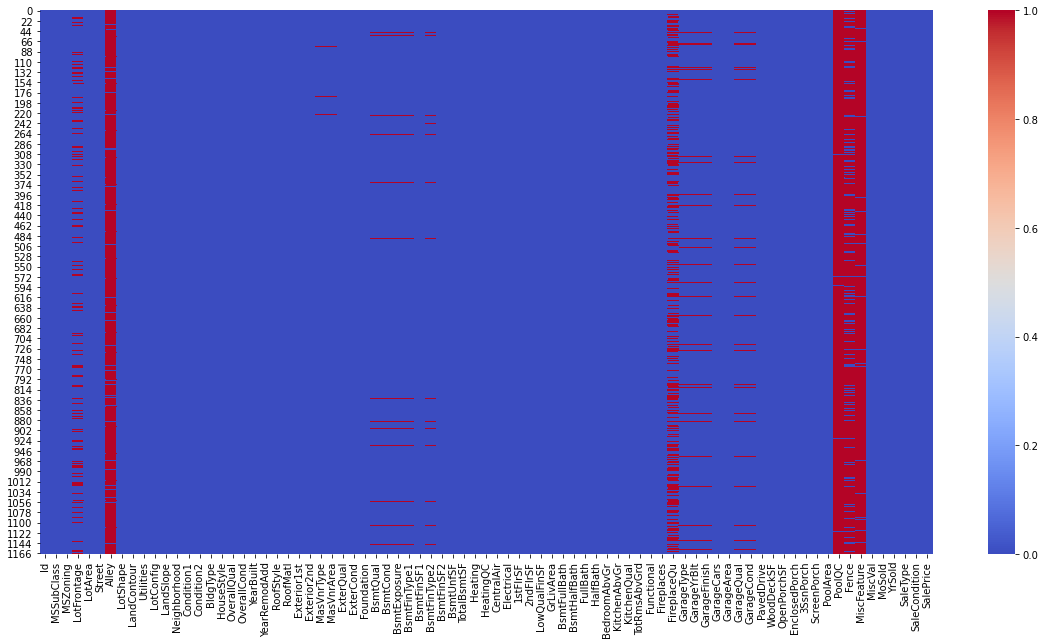

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),xticklabels=True, cmap="coolwarm")

In [18]:
# Let's check the percentage of missing values of each column

def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values(df)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

Here we can see that the columns PoolQC, MiscFeature, Alley and Fence has the maximum number of the null values/ missing values

In [20]:
# Let's fill the missing values in categorical columns as NA

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
df[columns] = df[columns].fillna('NA')

In [21]:
# Let's fill the missing values in MasVnrType with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# Let's fill the missing values in GarageYrBlt with 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')

# Let's Imputing the missing values and replace it with the median
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [22]:
# Let's check statistics summary of our dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027  ...   
std       1.124343    30.145255     20.785185   182.218483   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

# Observation:

1. Maximum standard deviation of 8957.44 is observed in LotArea column.


2. Maximum SalePrice of a house observed is 755000 and minimum is 34900.


3. In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.


4. In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.


5. In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [23]:
# Let's check the correlation
corr=df.corr()
corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006165 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336234 -0.124151     0.070462   
LotFrontage   -0.006165   -0.336234     1.000000  0.296790     0.229981   
LotArea       -0.029212   -0.124151     0.296790  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229981  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047851  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112000  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.089513  0.027228     0.555945   
MasVnrArea    -0.061397    0.028215     0.188273  0.120192     0.403985   
BsmtFinSF1     0.003868   -0.052236     0.227732  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.001253  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.115628  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356180  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.402864  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089816  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.008087 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374000  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001375  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171842  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318941  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.228494  0.285983     0.390067   
GarageCars     0.007549   -0.027639     0.260224  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151044  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.021103 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.050499  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030440  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.195973  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.002830  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022579  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004162 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323851  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.061397    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.028215   -0.052236   
LotFrontage      -0.047851   0.112000      0.089513    0.188273    0.227732   
LotArea           0.017513   0.005506      0.027228    0.120192    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.403985    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.135133   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.318562    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.178583    0.114430   
MasVnrArea       -0.135133   0.318562      0.178583    1.000000    0.263377   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.263377    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.064685   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.108974   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.362330    0.518940   
1stFlrSF         -0.134420   0.279450      0.233384    0.334512 

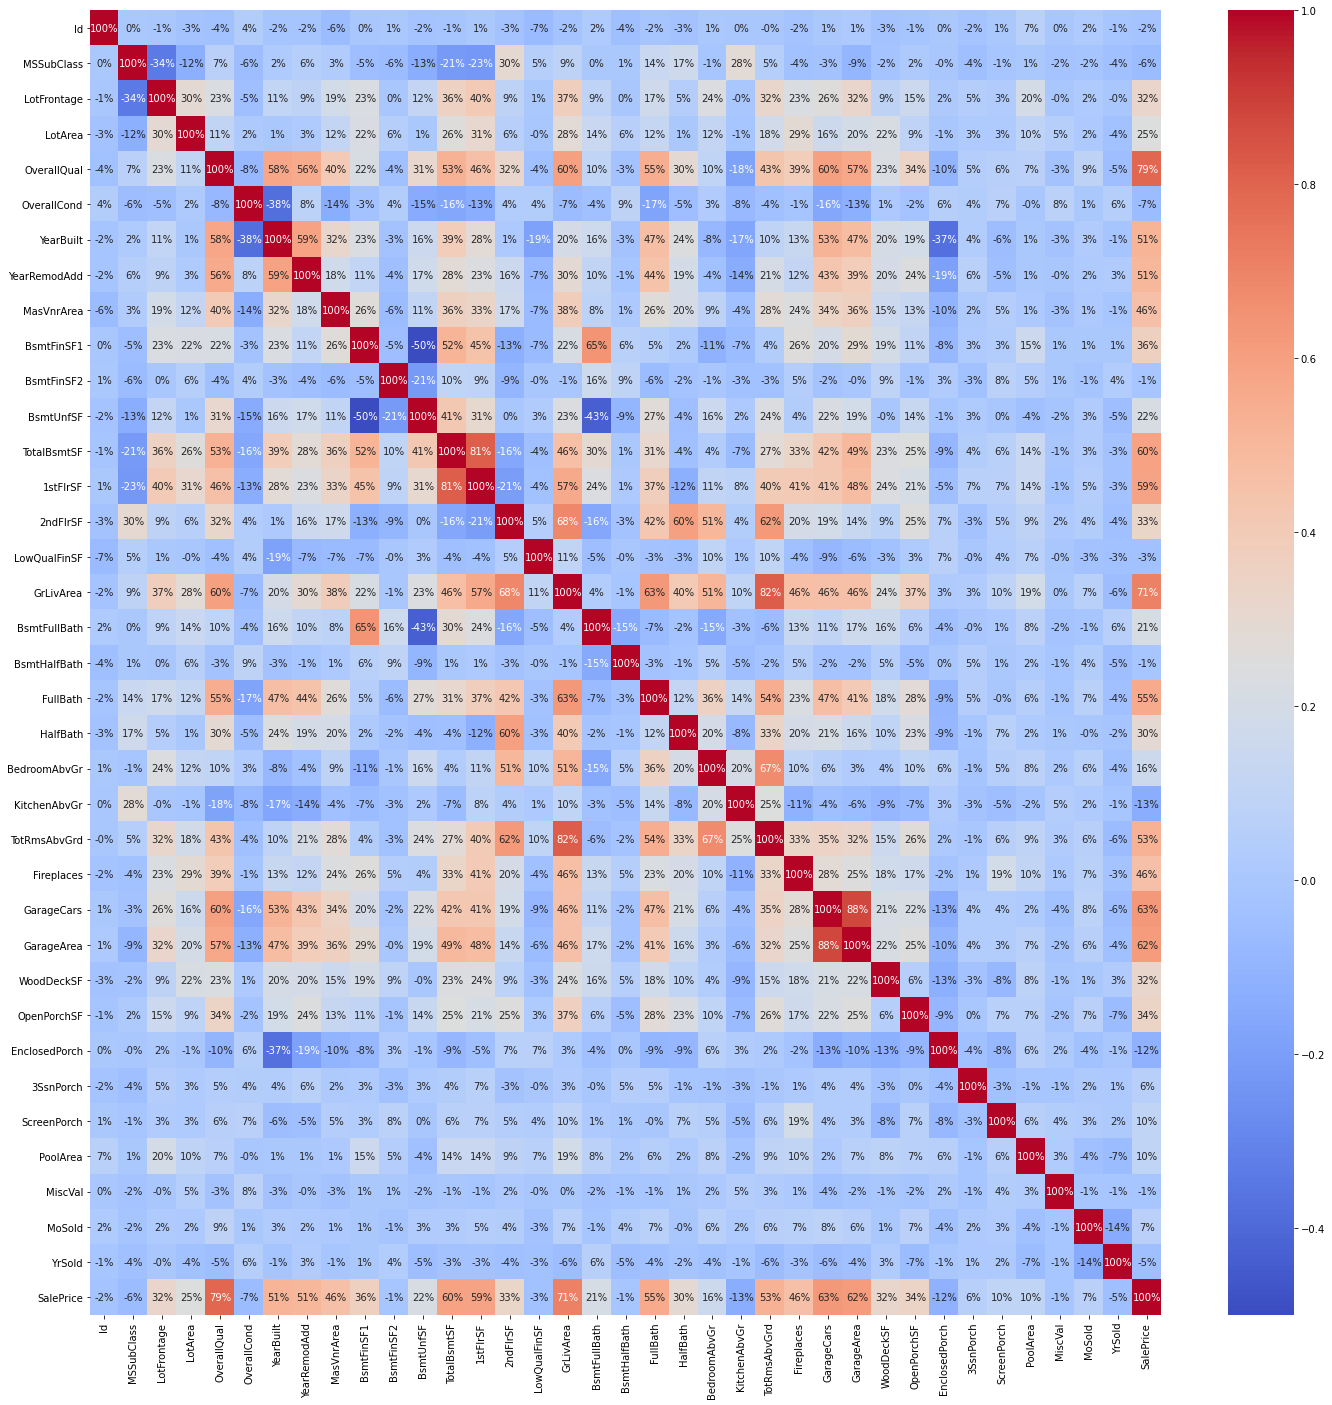

In [24]:
# Let's plot the heat map
plt.figure(figsize=(24,24))
sns.heatmap(corr,annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

# Observation:

1. SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.


2. SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.


3. We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).


4. No correlation has been observed between the column Id and other columns so we will be dropping this column.

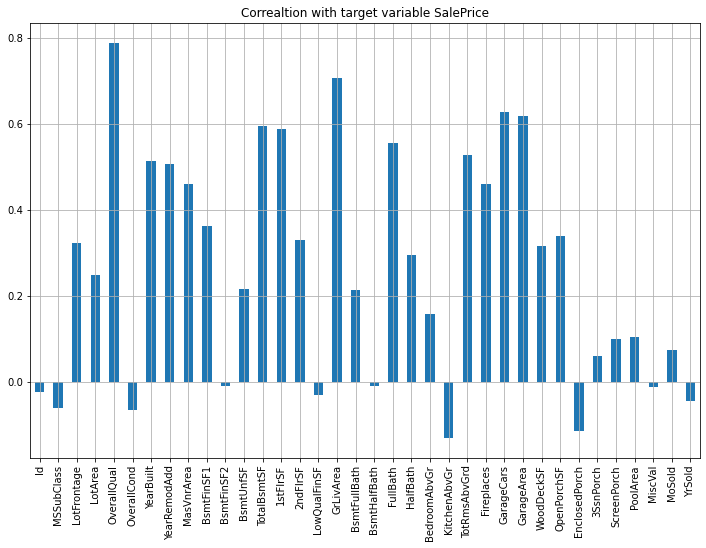

In [26]:
# Let's check the correlation with target variable 'SalePrice'
plt.figure(figsize=(12,8))
df.drop('SalePrice', axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice");

# Observation:

1. The column OverallQual is most positively correlated with SalePrice.


2. The column KitchenAbvGrd is most negatively correlated with SalePrice.

# Data Visualization

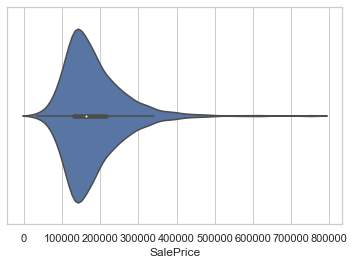

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [27]:
# Let's Check the target variable
sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

df['SalePrice'].value_counts()

# Observation:

Maximum number of SalePrice lies between 140000 and 230000.

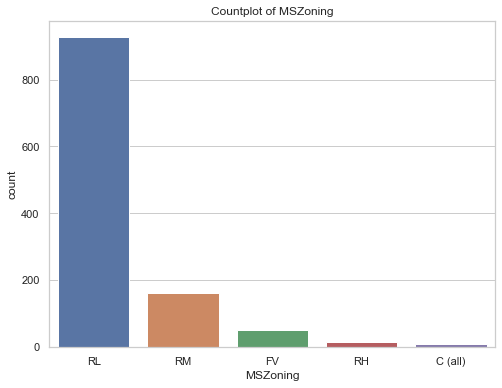

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [29]:
# Let's check the column MsZoning
plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=df)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

df['MSZoning'].value_counts()

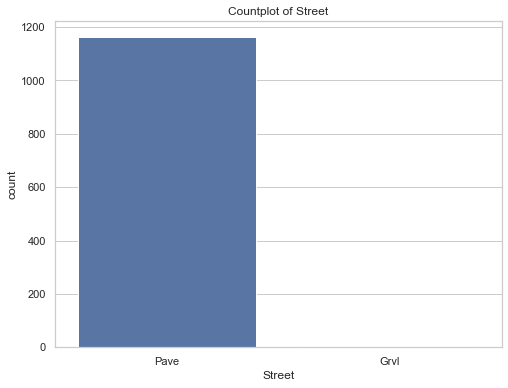

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [30]:
# Let's check the column Street
plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=df)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

df['Street'].value_counts()

# Observation:

Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

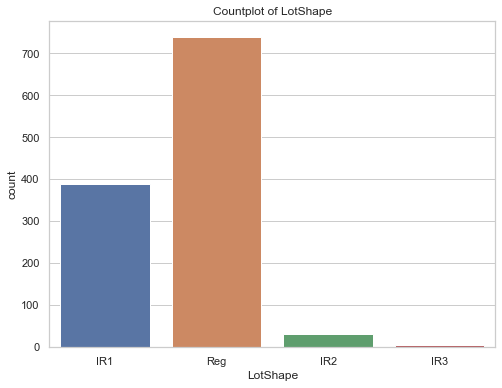

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [31]:
# Let's check the column LotShape
plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=df)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

df['LotShape'].value_counts()

# Observation:

Maximum, 740 number of LotShape are Reg.

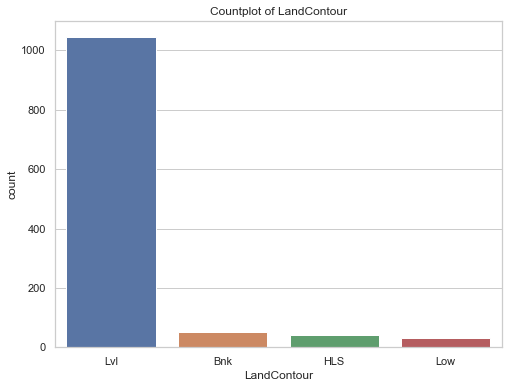

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [32]:
# Let's check the column LandContour
plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=df)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

df['LandContour'].value_counts()

# Observation:

Maximum, 1046 number of LandContour are Lvl.

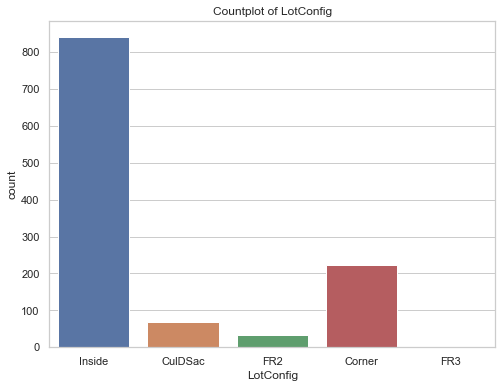

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [33]:
# Let's check the column LotConfig
plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=df)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

df['LotConfig'].value_counts()

# Observation:

Maximum, 842 number of LotConfig are Inside.

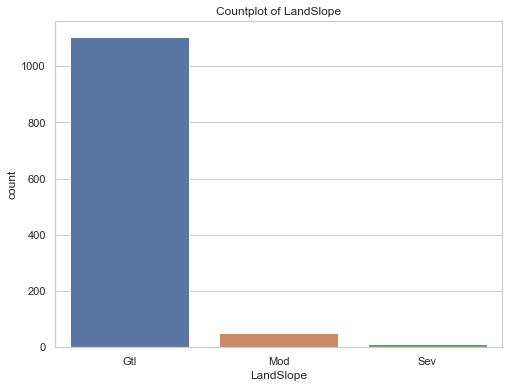

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [34]:
# Let's check the column LandSlope
plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=df)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

df['LandSlope'].value_counts()

# Observation:

Maximum, 1105 number of LandSlope are Gtl.

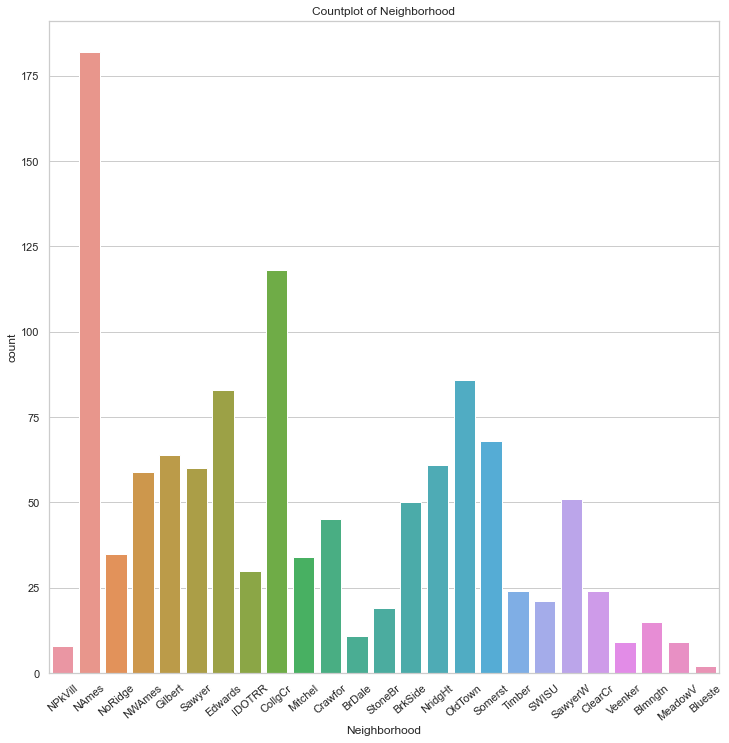

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [36]:
# Let's check the column Neighborhood
plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=df)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

df['Neighborhood'].value_counts()

# Observation:
Maximum, 182 number of Neighborhood are Names.

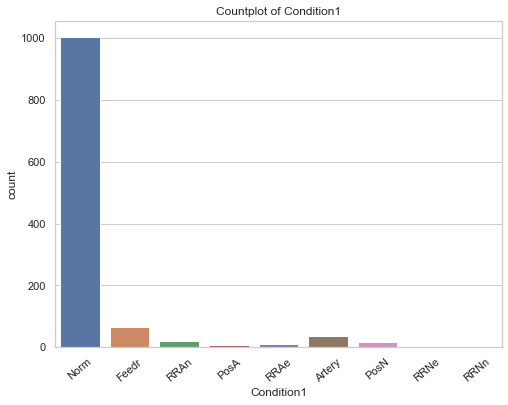

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [37]:
# Let's check the column Condition1
plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=df)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

df['Condition1'].value_counts()

# Observation:
Maximum, 1005 number of Condition1 is Norm.

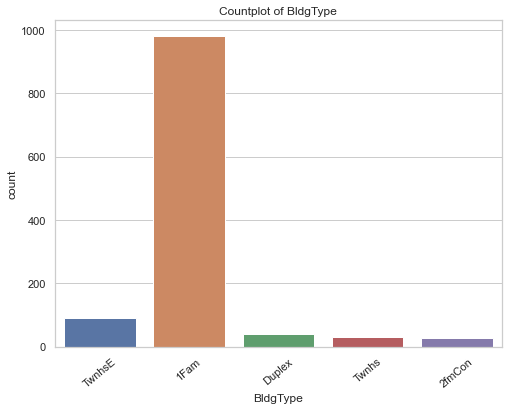

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [38]:
# Let's check the column BldgType
plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

df['BldgType'].value_counts()

# Observation:
Maximum, 981 number of BldgType are 1Fam.

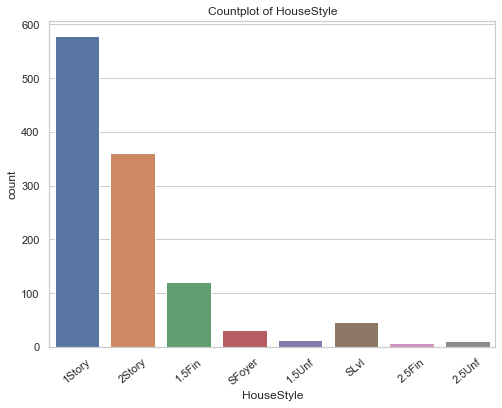

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [39]:
# Let's check the column HouseStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

df['HouseStyle'].value_counts()

# Observation:
1Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc

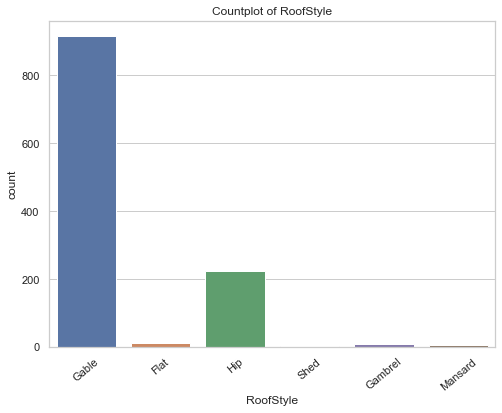

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [40]:
# Let's check the column RoofStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

df['RoofStyle'].value_counts()

# Observation:
Maximum, 915 number of RoofStyle are Gable.

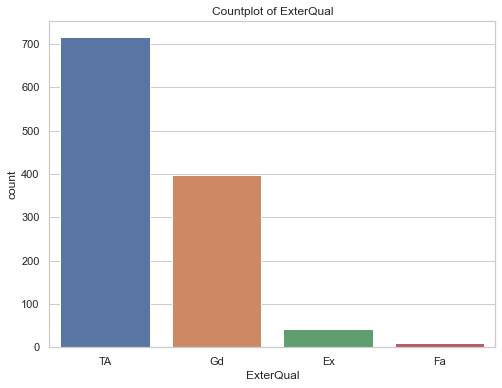

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [41]:
# Let's check the column ExterQual
plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

df['ExterQual'].value_counts()

# Observation:
Maximum, 717 number of ExterQual is TA.

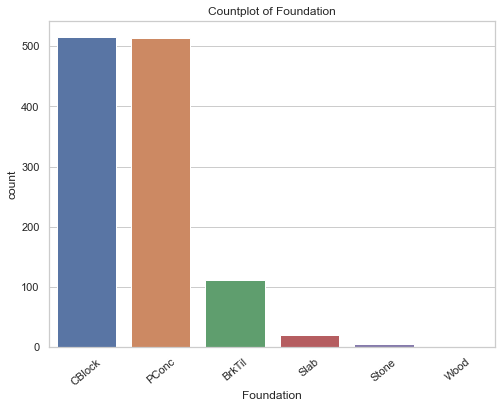

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [43]:
# Let's checking the column Foundation
plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

df['Foundation'].value_counts()

# Observation:
Maximum, 516 number of Foundation are CBlock.

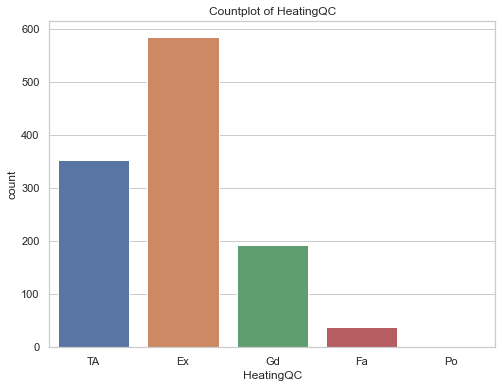

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [44]:
# Let's check the column HeatingQC
plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

df['HeatingQC'].value_counts()

# Observation:
Maximum, 585 number of HeatingQC is Ex.

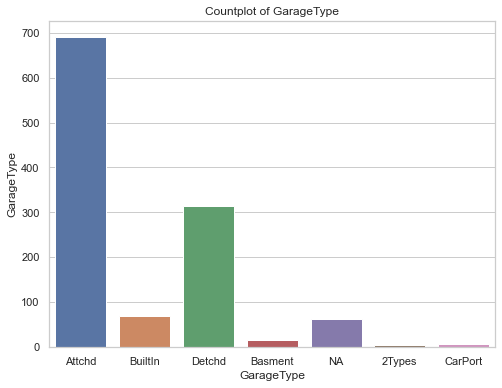

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [45]:
# Let's check the column GarageType
plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

df['GarageType'].value_counts()

# Observation:
Maximum, 691 number of GarageType are Attchd.

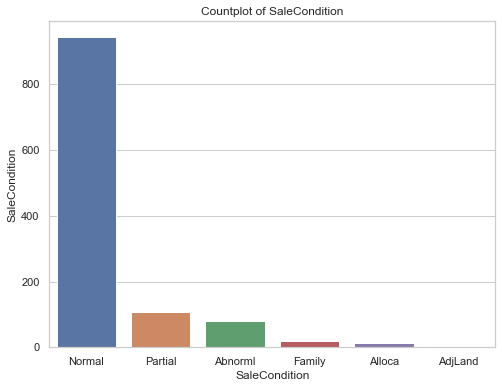

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [46]:
# Let's check the column SaleCondition
plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

df['SaleCondition'].value_counts()

# Observation:
Maximum, 945 number of SaleCondition is normal.

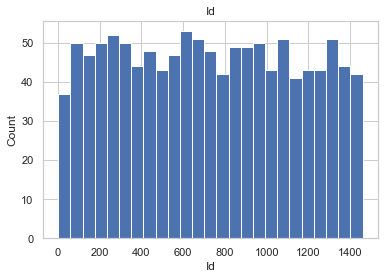

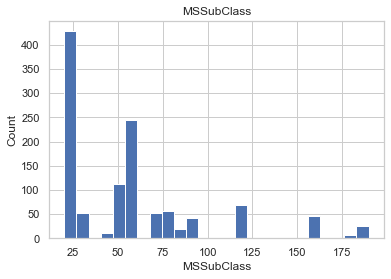

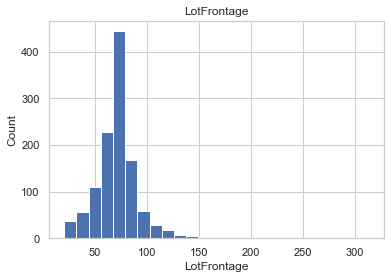

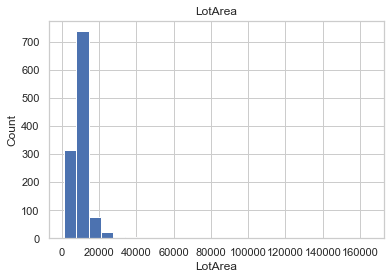

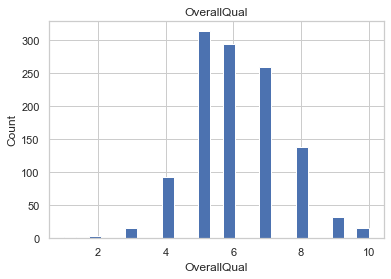

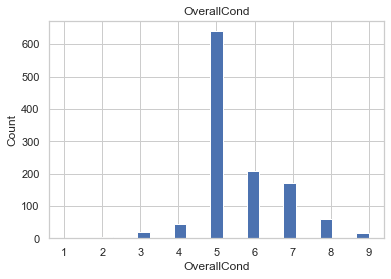

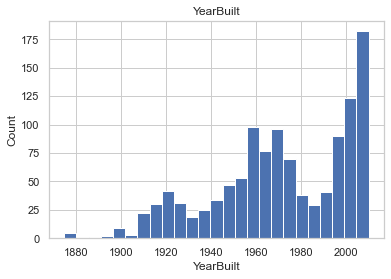

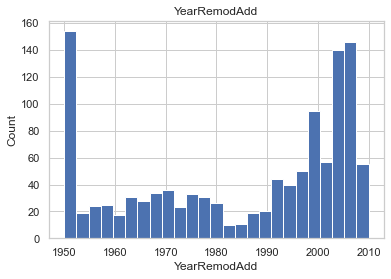

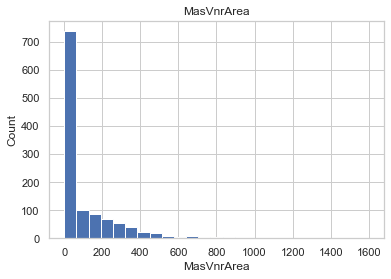

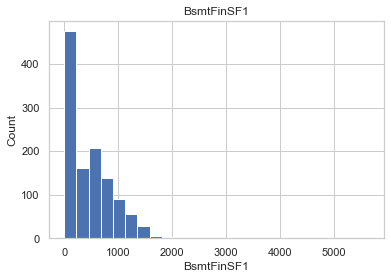

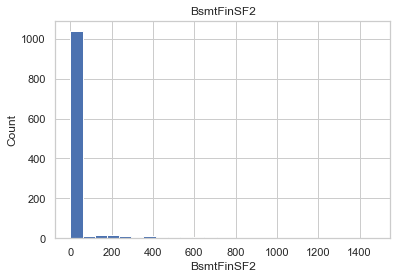

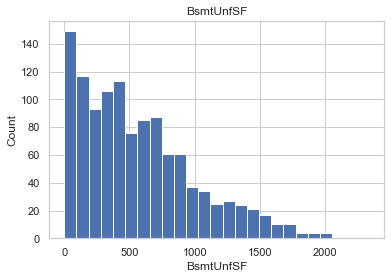

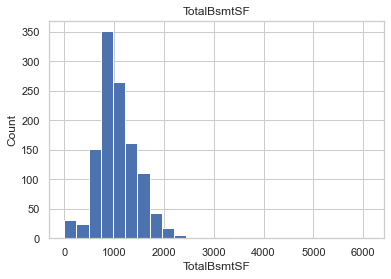

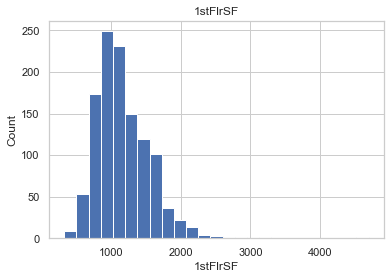

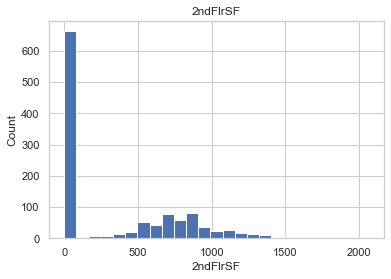

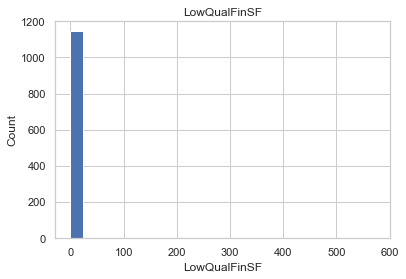

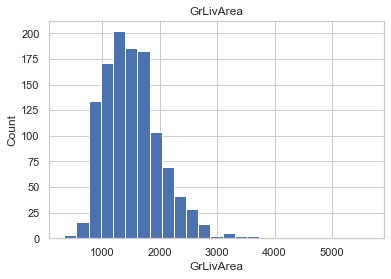

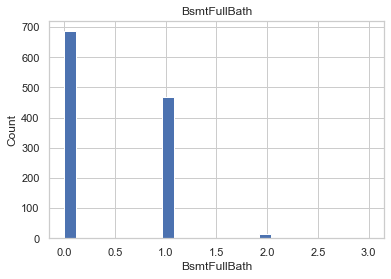

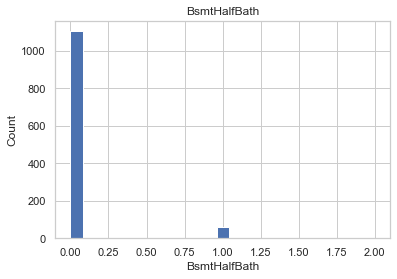

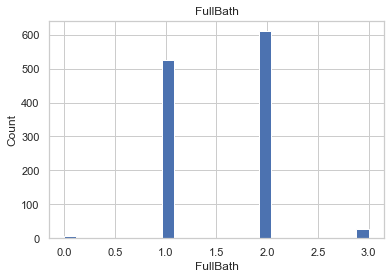

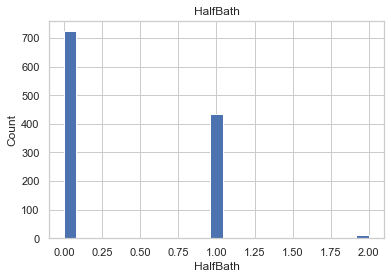

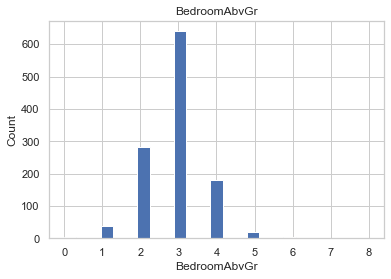

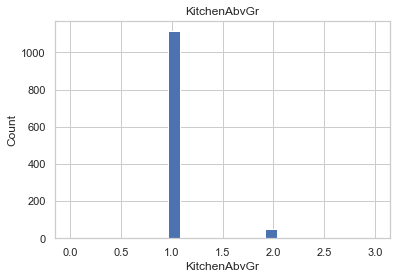

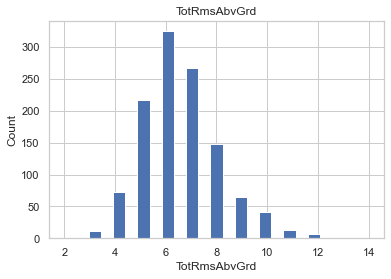

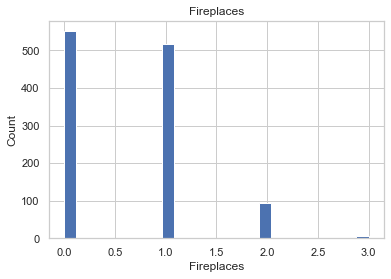

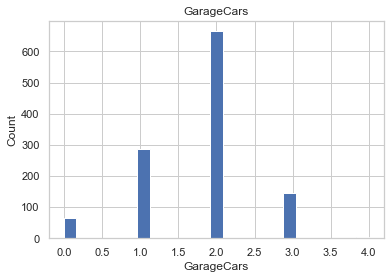

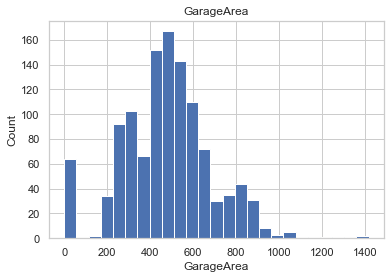

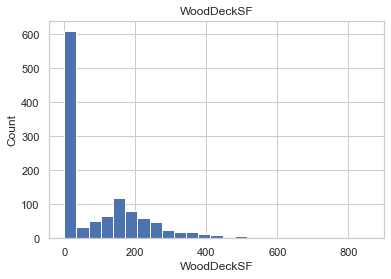

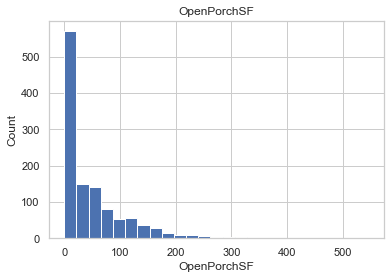

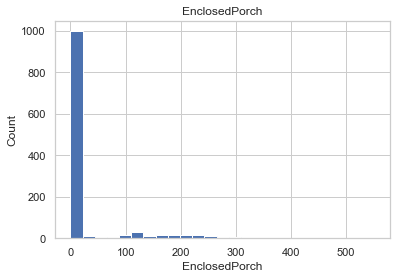

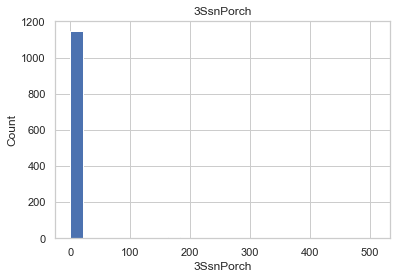

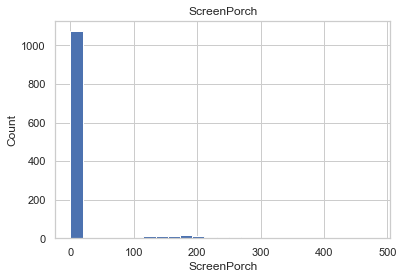

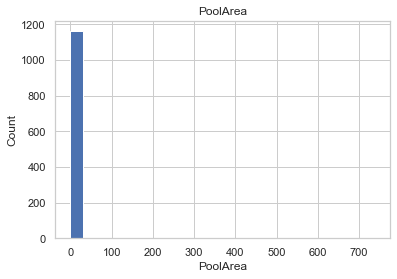

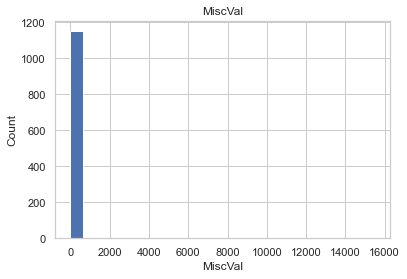

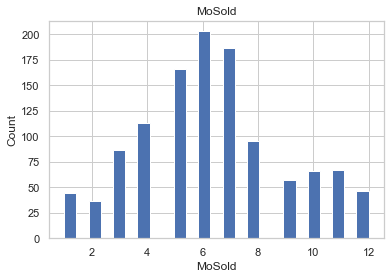

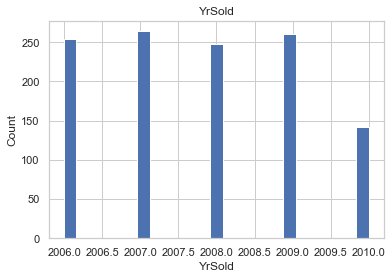

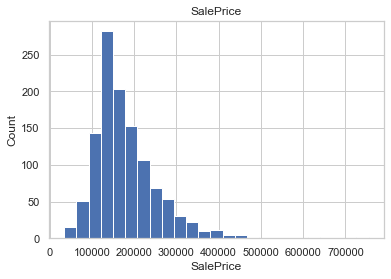

In [47]:
# Let's plot the histogram of every numerical column
for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

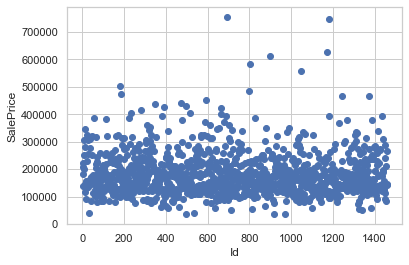

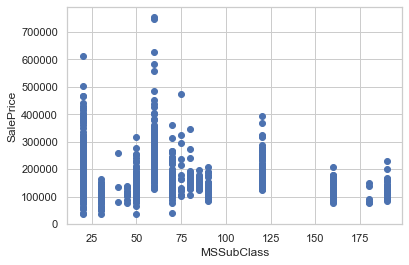

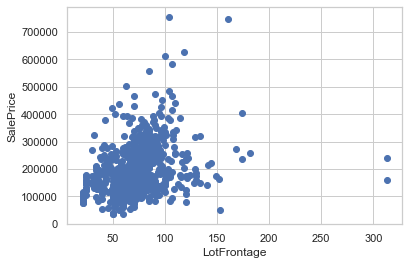

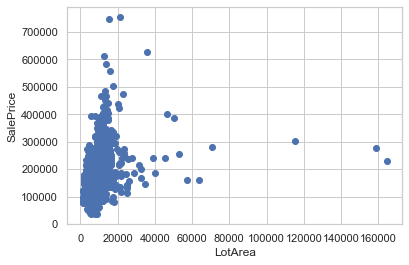

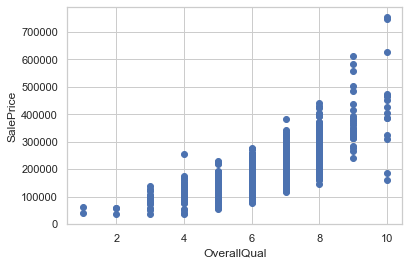

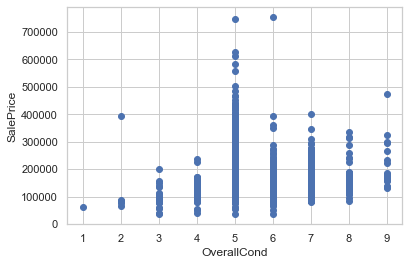

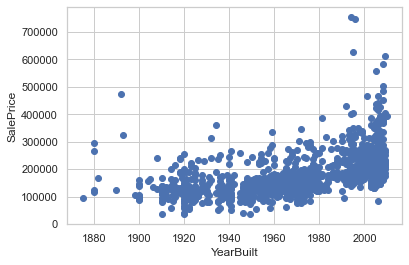

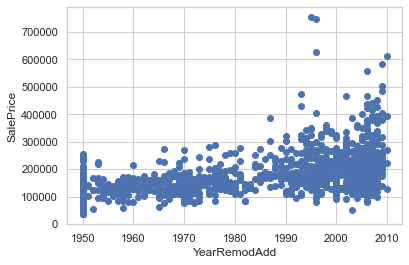

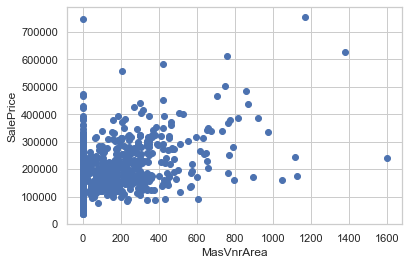

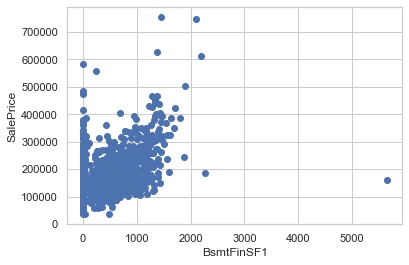

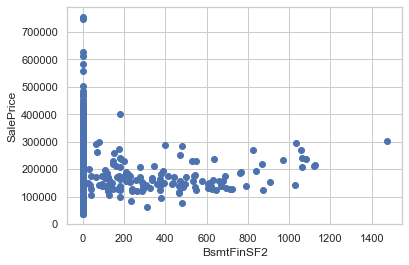

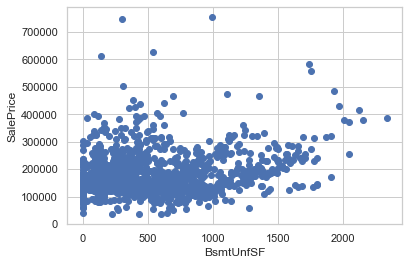

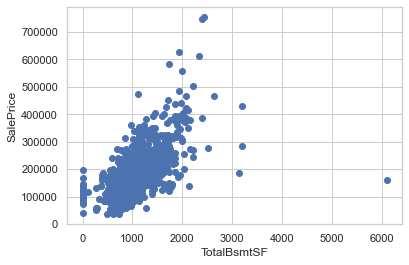

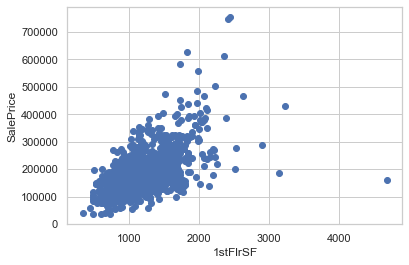

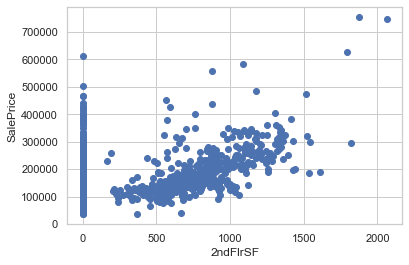

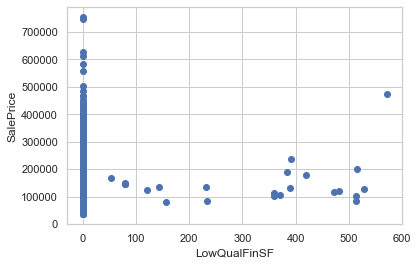

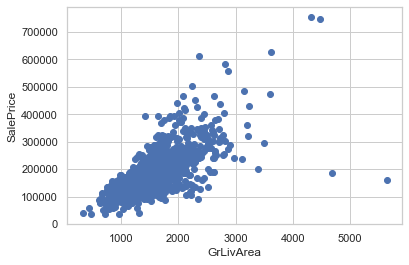

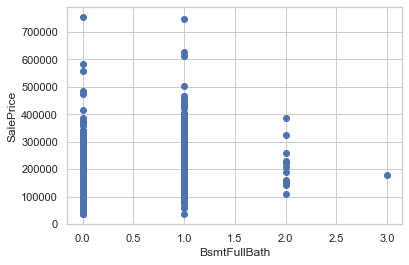

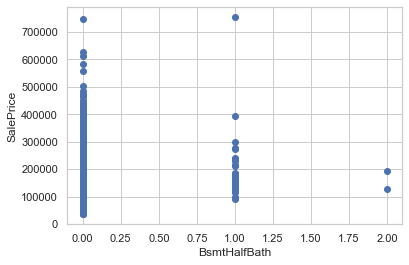

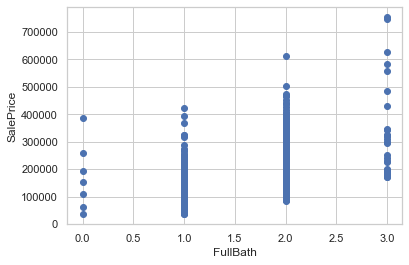

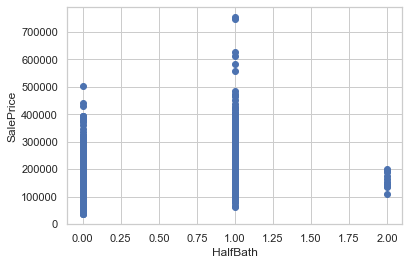

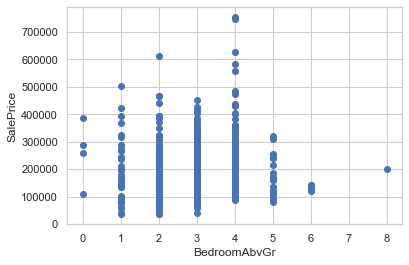

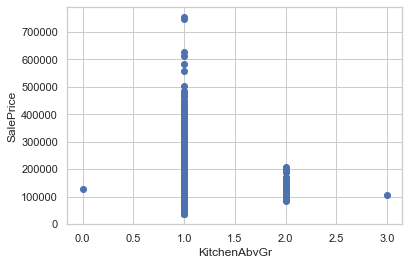

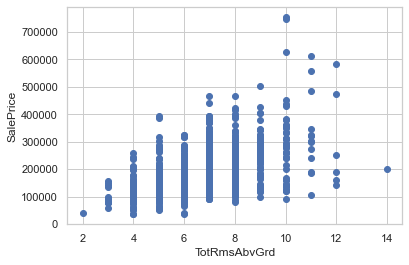

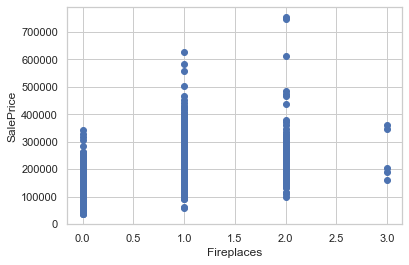

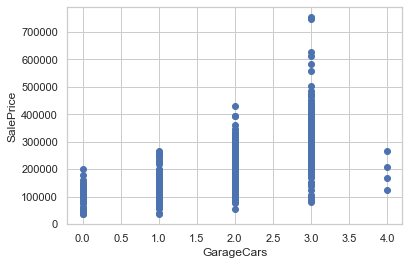

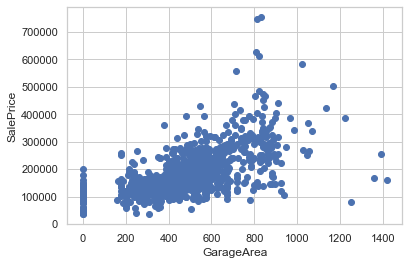

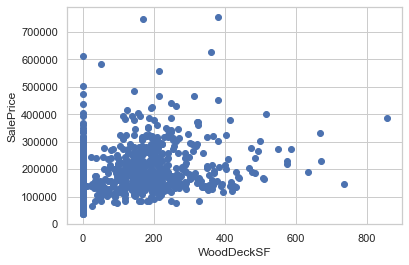

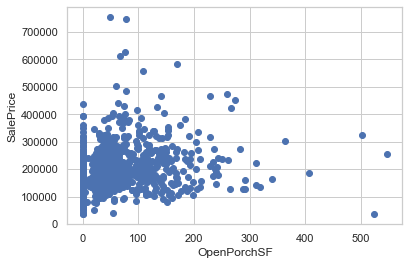

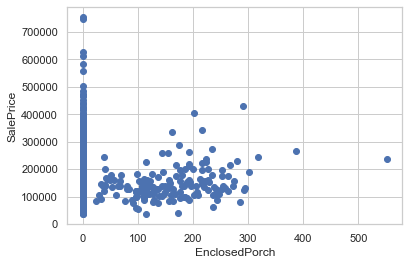

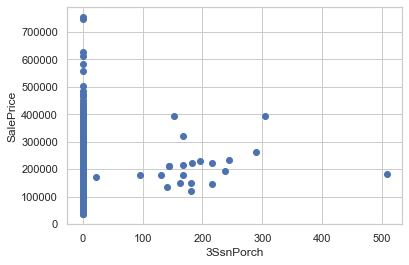

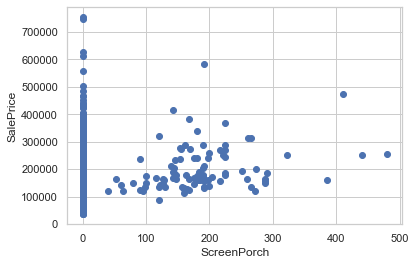

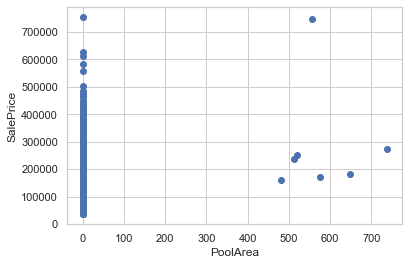

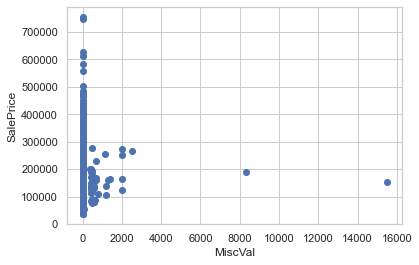

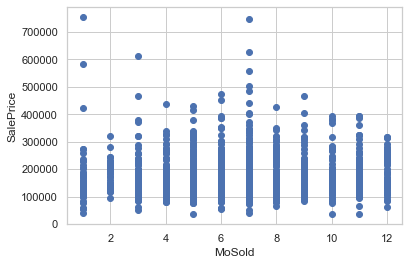

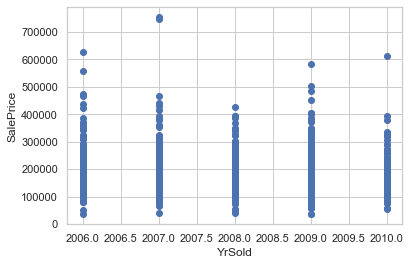

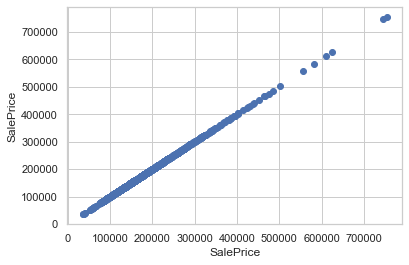

In [48]:
# Let's plot the Scatter plot between all feature variables and target variable
for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

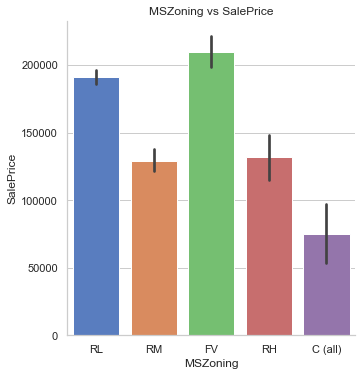

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [49]:
# Let's plot the Factor plot of MSZoning vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df.groupby('SalePrice')['MSZoning'].value_counts());

# Observation:
SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

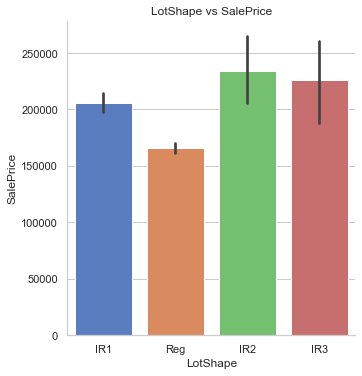

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [50]:
# Let's plot the Factor plot of LotShape vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(df.groupby('SalePrice')['LotShape'].value_counts());

# Observation:
SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

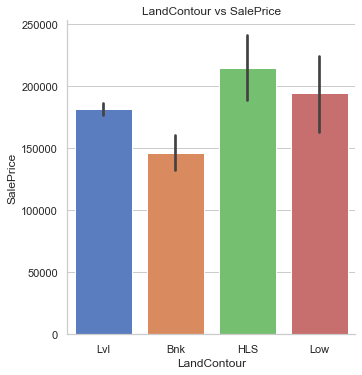

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [51]:
# Let's plot the Factor plot of LandContour vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df.groupby('SalePrice')['LandContour'].value_counts())

# Observation:
SalePrice is maximum with HLS LandContour.

<Figure size 576x432 with 0 Axes>

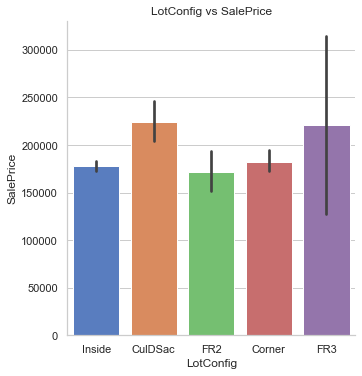

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [52]:
# Let's plot the Factor plot of LotConfig vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['LotConfig'].value_counts())

# Observation:
SalePrice is maximum with CulDsac LotConfig.

<Figure size 1800x1800 with 0 Axes>

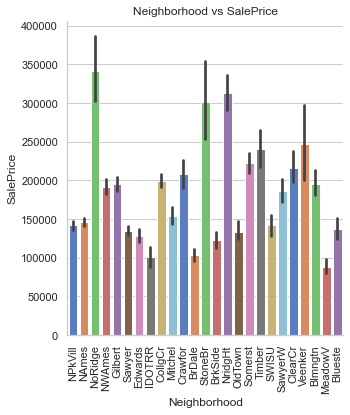

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [56]:
# Let's plo the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(25,25))
sns.factorplot(x='Neighborhood',y='SalePrice',data=df,kind='bar',palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['Neighborhood'].value_counts())

# Observation:
SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

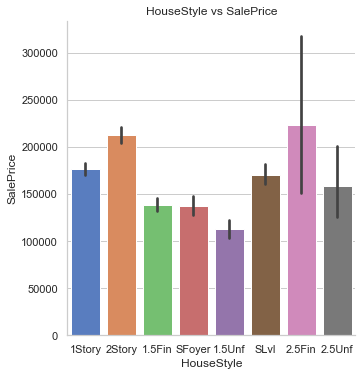

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [57]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['HouseStyle'].value_counts())

# Observation:
SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

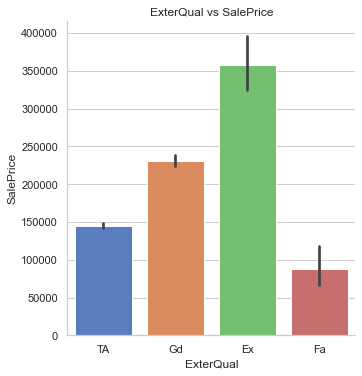

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [58]:
# Let's plot the Factor plot of ExterQual vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['ExterQual'].value_counts())

# Observation:
SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

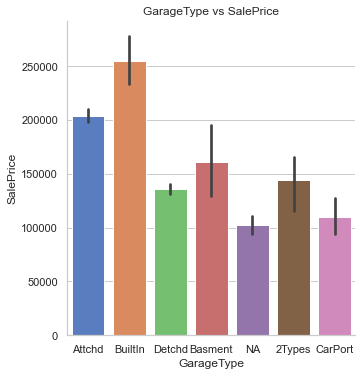

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [60]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['GarageType'].value_counts())

# Observation:
SalePrice is maximum with Builtin GarageType.

<Figure size 576x432 with 0 Axes>

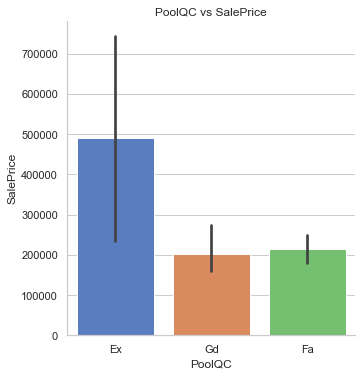

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [61]:
# Let's plot the Factor plot of PoolQC vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['PoolQC'].value_counts())

# Observation:
SalePrice is maximum with Ex PoolQC.

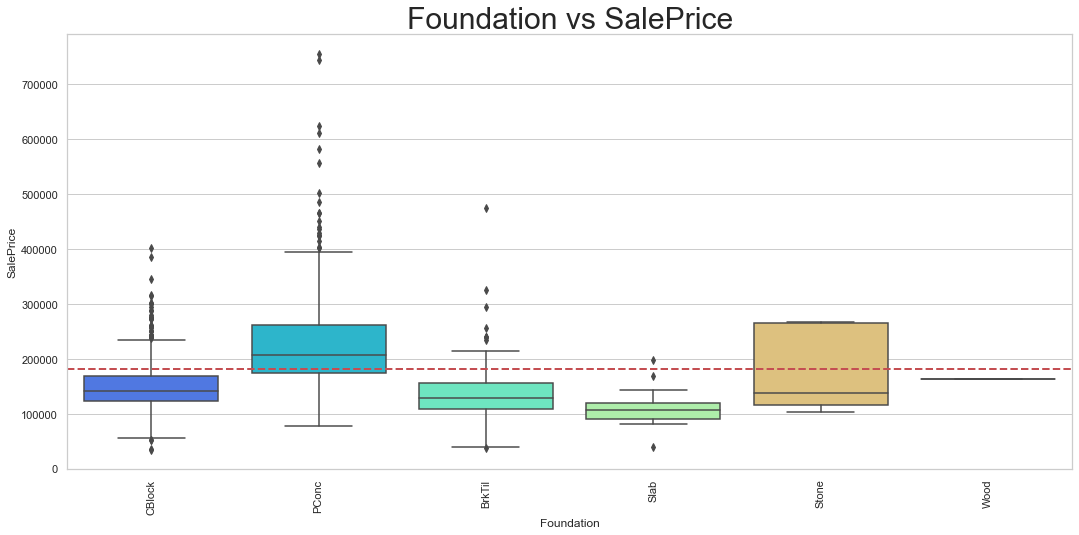

In [62]:
# Let's plot the Foundation vs SalePrice plot
plt.figure(figsize=(18,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

# Observation:
SalePrice is maximum with PConc.

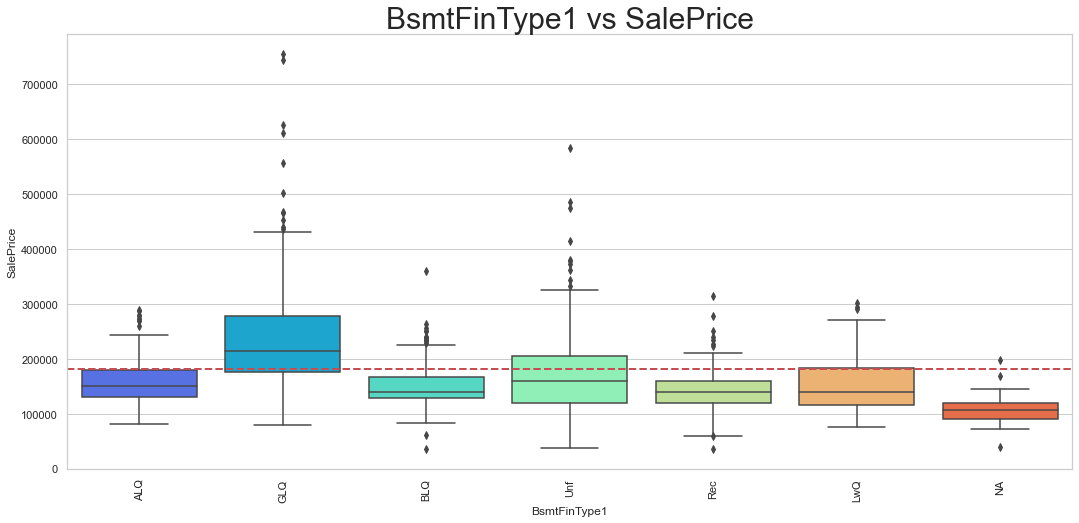

In [63]:
# Let's plot the BsmtFinType1 vs SalePrice plot
plt.figure(figsize=(18,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

# Observation:
SalePrice is maximum with GLQ BsmtFinType1.

# Multivariate Analysis

Multivariate analysis is a set of statistical techniques used for analysis of data that contain more than one variable

<Figure size 1008x1008 with 0 Axes>

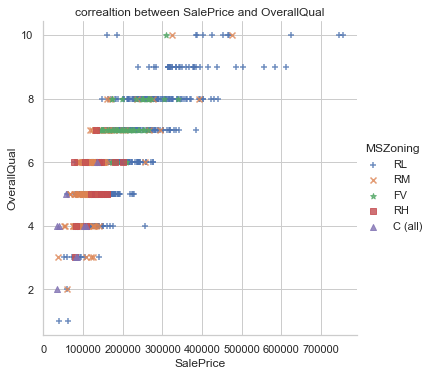

In [64]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallQual',fit_reg=False,data=df,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and OverallQual')
plt.ylabel('OverallQual')
plt.show()

# Observation:
With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

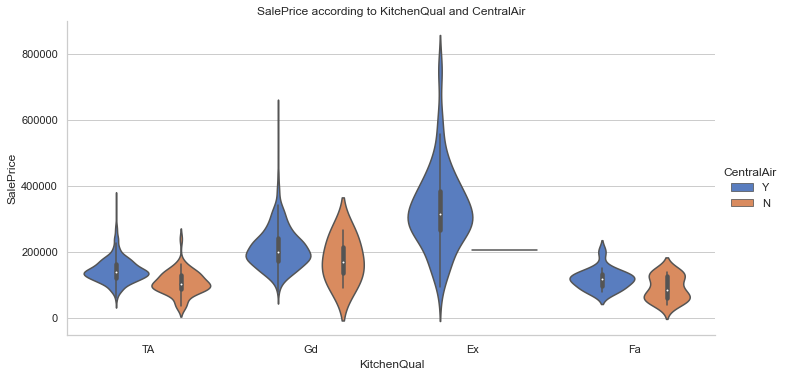

In [65]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=df,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

# Observation:
SalePrice is maximum with Ex kitchenQual and CentralAir.

<Figure size 1008x1008 with 0 Axes>

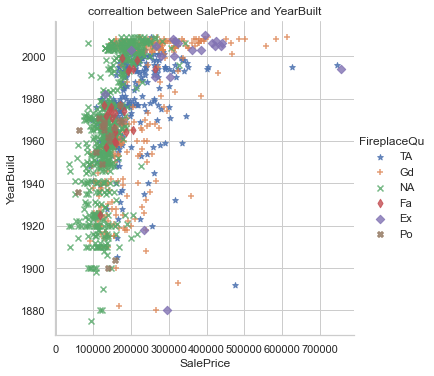

In [66]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=df,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.show()

# Observation:
As the YearBuilt is increasing SalePrice is also increasing.

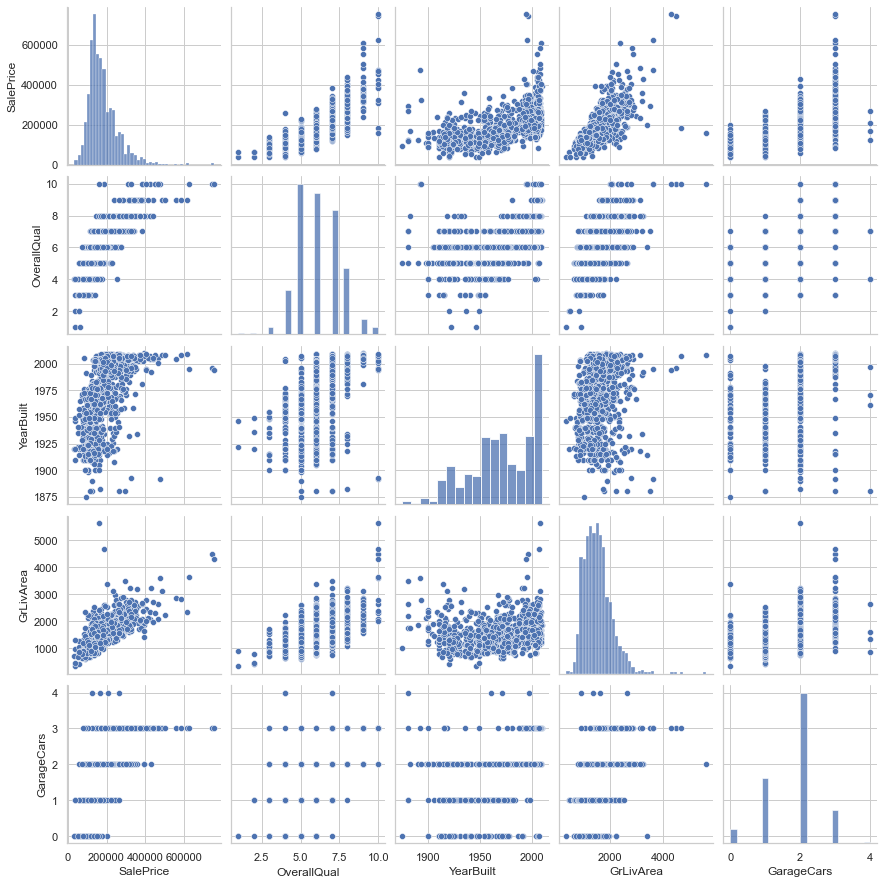

In [67]:
# Let's plot the pairplot

sns.pairplot(df, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars']);

# Observation:
SalePrice is highly positively correlated with GrLivArea and OverallQual.

# Data Pre-Processing

It is a process of preparing the raw data and making it suitable for a machine learning model.

In [68]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
df

Id  MSSubClass  LotFrontage  LotArea Alley Utilities  OverallQual  \
0     127         120         70.0     4928   NaN    AllPub            6   
1     889          20         95.0    15865   NaN    AllPub            8   
2     793          60         92.0     9920   NaN    AllPub            7   
3     110          20        105.0    11751   NaN    AllPub            6   
4     422          20         70.0    16635   NaN    AllPub            6   
...   ...         ...          ...      ...   ...       ...          ...   
1163  289          20         70.0     9819   NaN    AllPub            5   
1164  554          20         67.0     8777   NaN    AllPub            4   
1165  196         160         24.0     2280   NaN    AllPub            6   
1166   31          70         50.0     8500  Pave    AllPub            4   
1167  617          60         70.0     7861   NaN    AllPub            6   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5       1976          1976  ...               0   
1               6       1970          1970  ...               0   
2               5       1996          1997  ...               0   
3               6       1977          1977  ...               0   
4               7       1977          2000  ...               0   
...           ...        ...           ...  ...             ...   
1163            5       1967          1967  ...               0   
1164            5       1949          2003  ...               0   
1165            6       1976          1976  ...               0   
1166            4       1920          1950  ...               0   
1167            5       2002          2003  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            0   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1163               0             0             0            1   
1164               0             0             0            1   
1165               0             0             0            1   
1166               0             0             0            1   
1167               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1163                      0                     0                     0   
1164                      0                     0                     0   
1165                      0                     0                     0   
1166                      0                     0                     0   
1167                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0  
...                    ...                    ...  
1163                     1                      0  
1164                     1                      0  
1165                     1                      0  
1166                     1                      0  
1167                     1         

In [69]:
# Let's drop unnecessary columns
df.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0             1976         0.0         120           0  ...               0   
1             1970         0.0         351         823  ...               0   
2             1997         0.0         862           0  ...               0   
3             1977       480.0         705           0  ...               0   
4             2000       126.0        1246           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1163          1967        31.0         450           0  ...               0   
1164          2003         0.0           0           0  ...               0   
1165          1976         0.0         566           0  ...               0   
1166          1950         0.0           0           0  ...               0   
1167          2003         0.0         457           0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            0   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1163               0             0             0            1   
1164               0             0             0            1   
1165               0             0             0            1   
1166               0             0             0            1   
1167               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1163                      0                     0                     0   
1164                      0                     0                     0   
1165                      0                     0                     0   
1166                      0                     0                     0   
1167                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0  
...                    ...                    ...  
1163                     1                      0  
1164      

# Handling outliers and skewness through winsorization technique

In [70]:
# Let's make a copy of our dataset

df_cap = df.copy()

In [74]:
from scipy import stats

def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [75]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [76]:
percentile_capping(df, features, 0.01, 0.10)

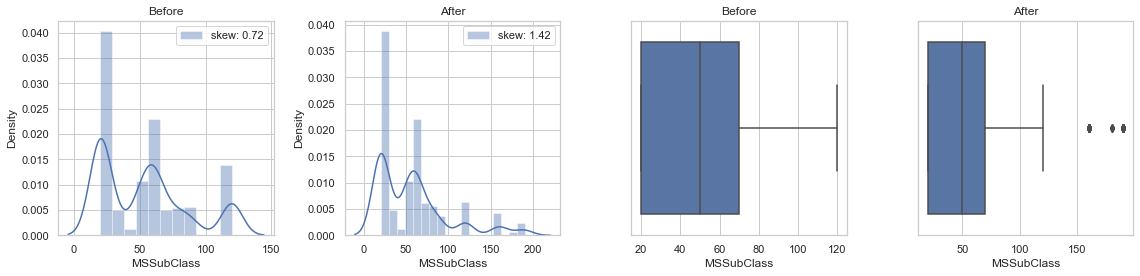

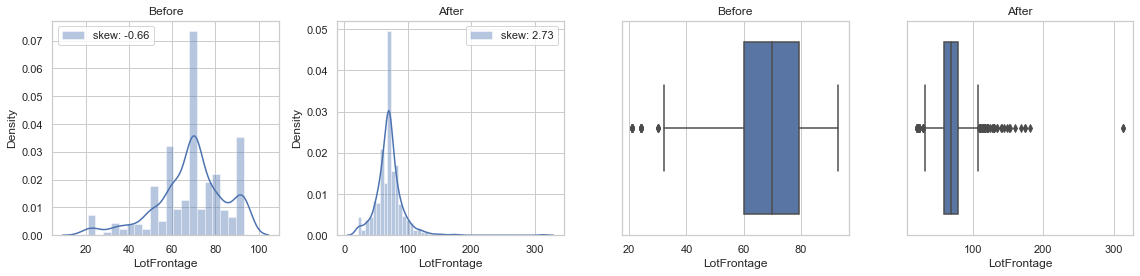

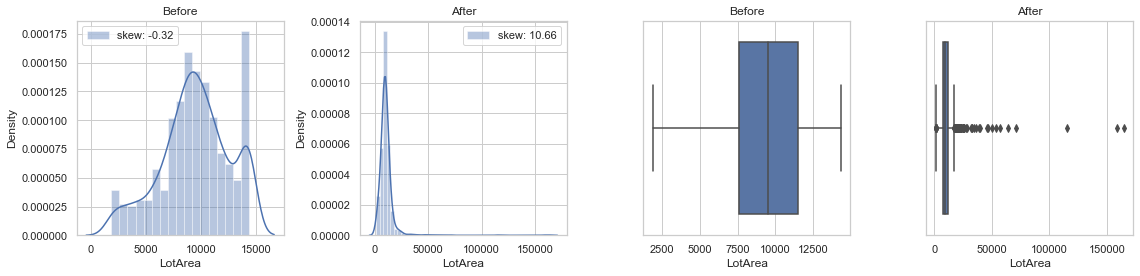

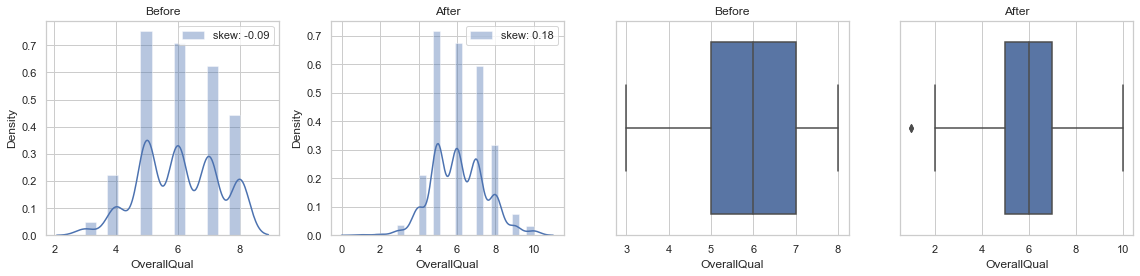

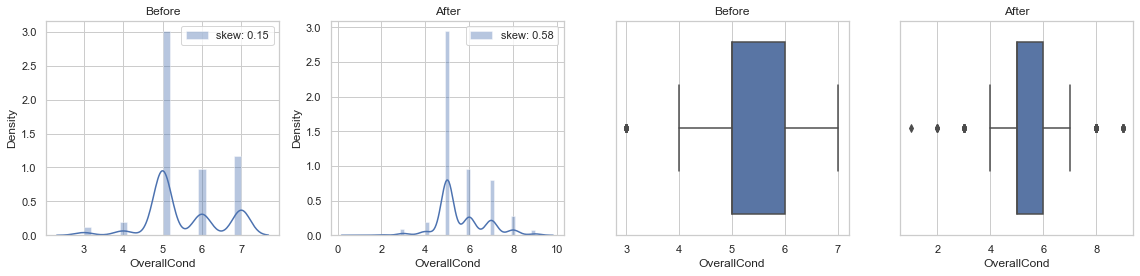

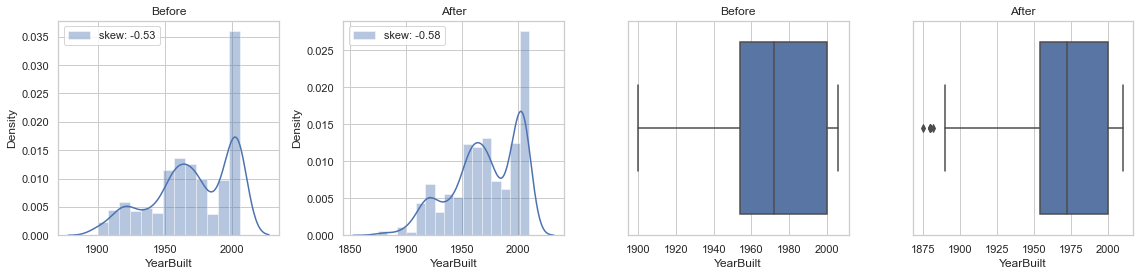

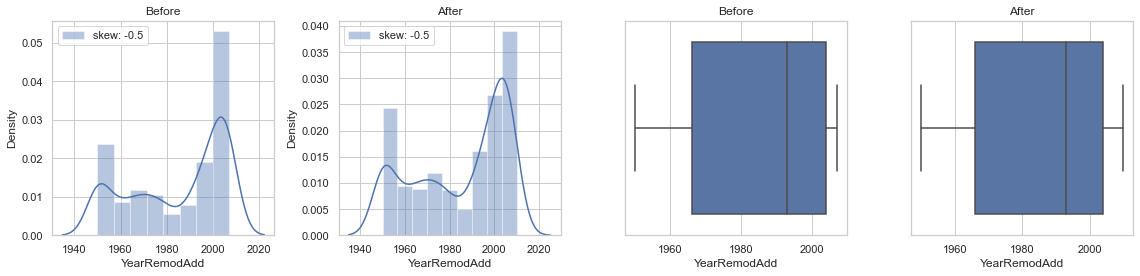

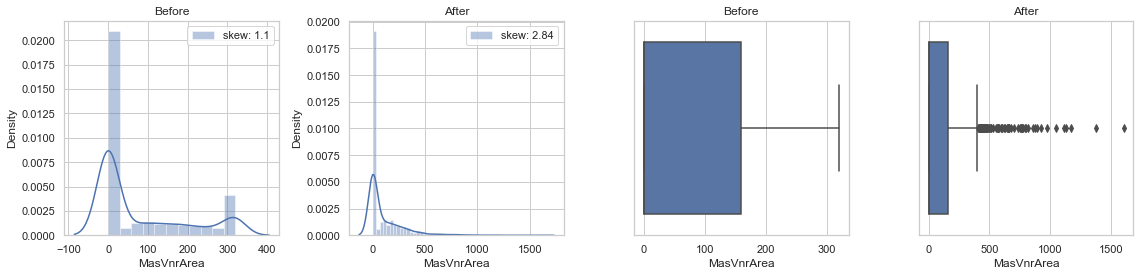

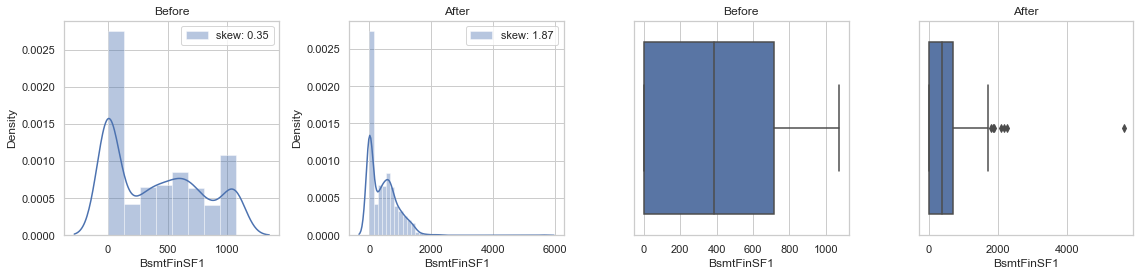

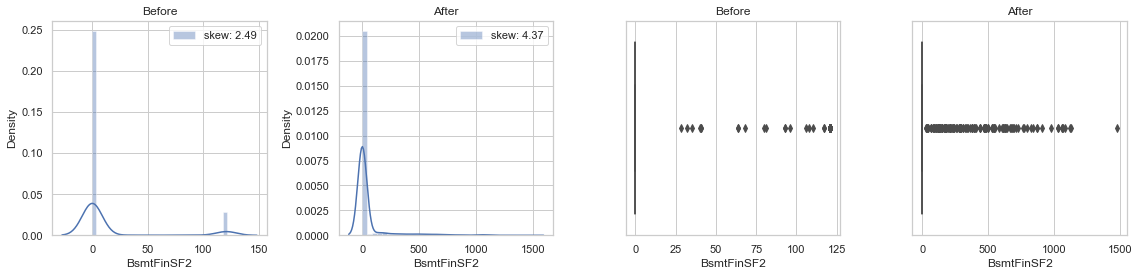

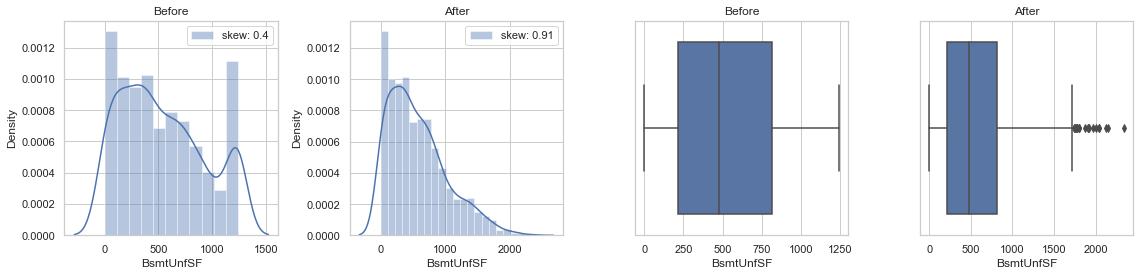

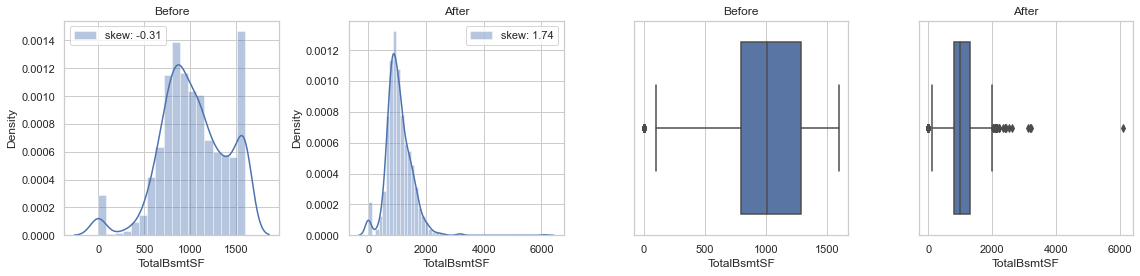

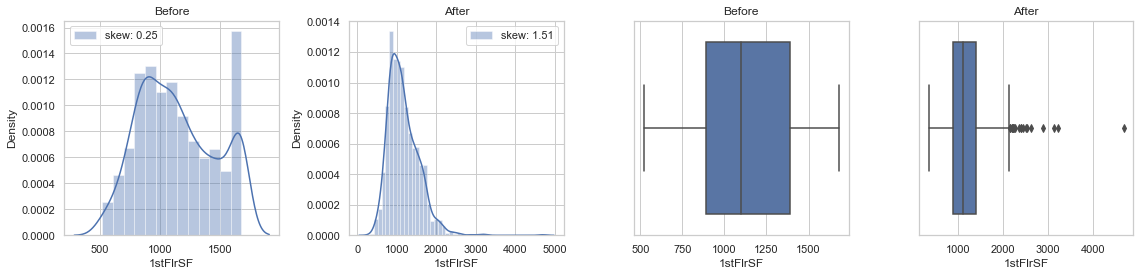

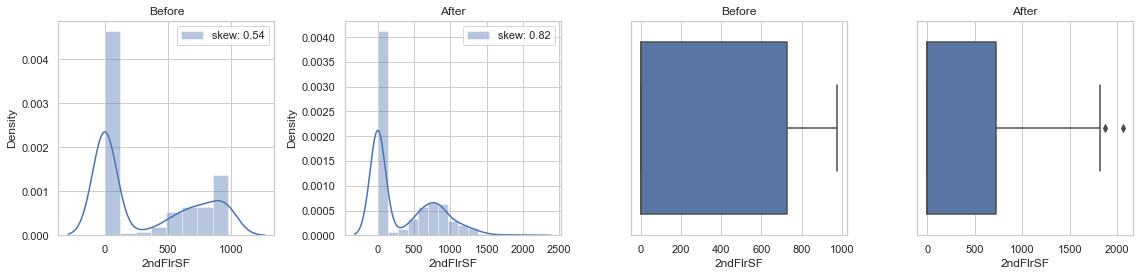

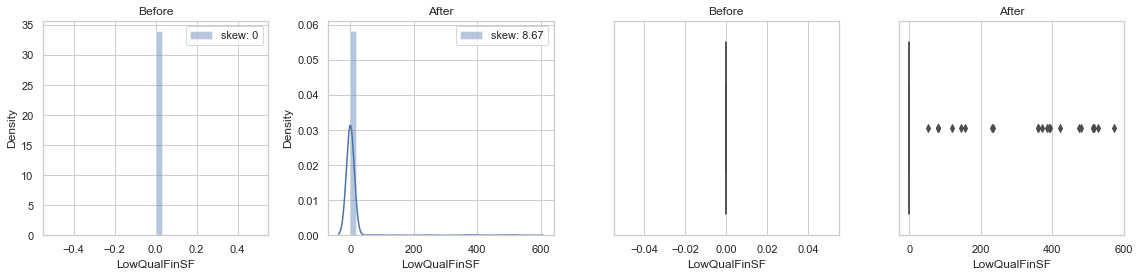

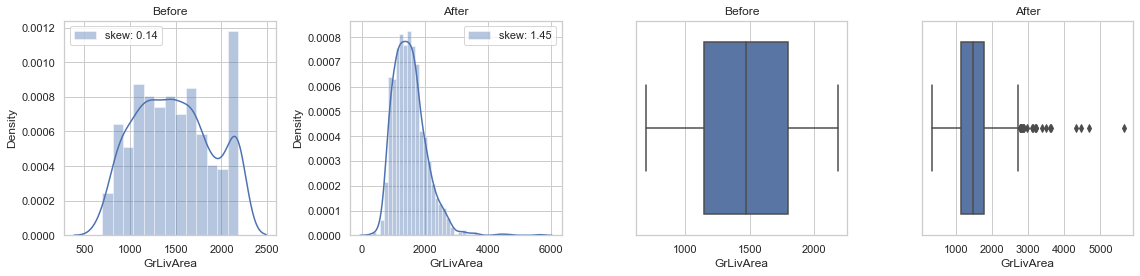

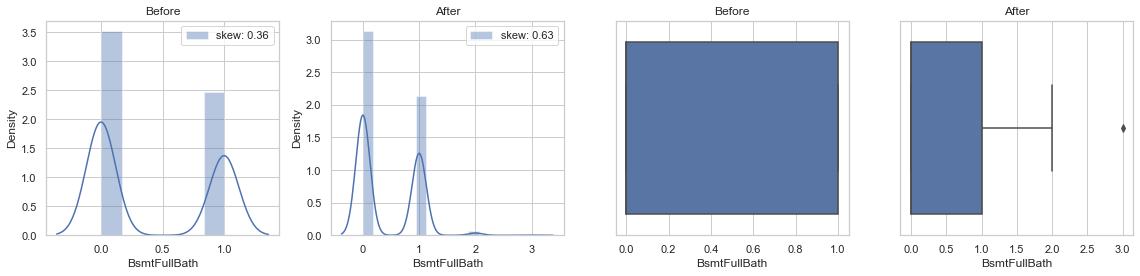

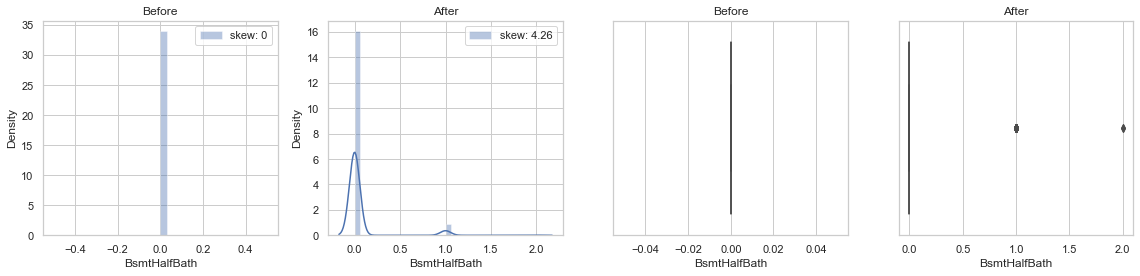

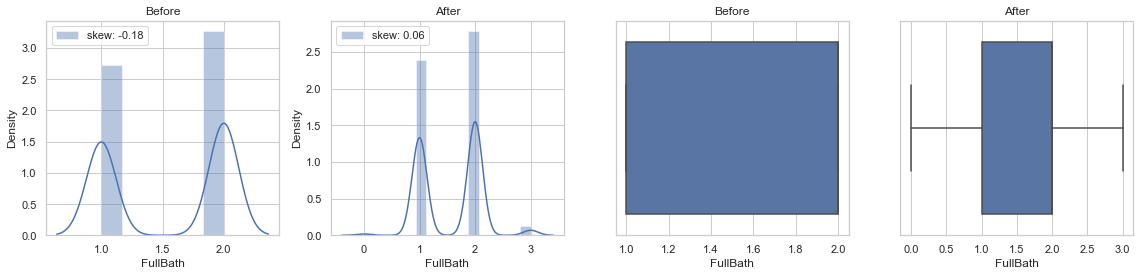

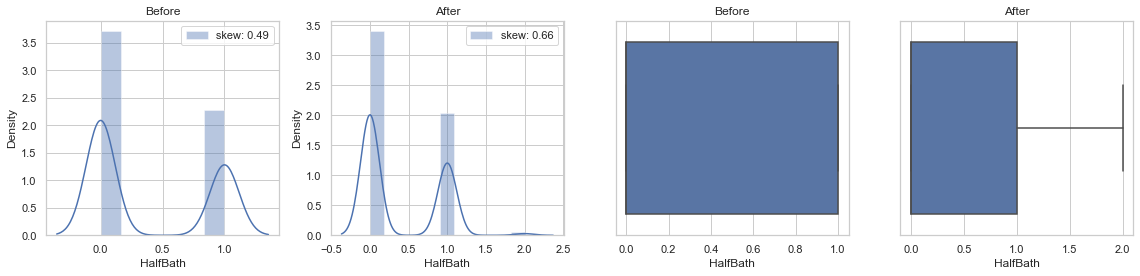

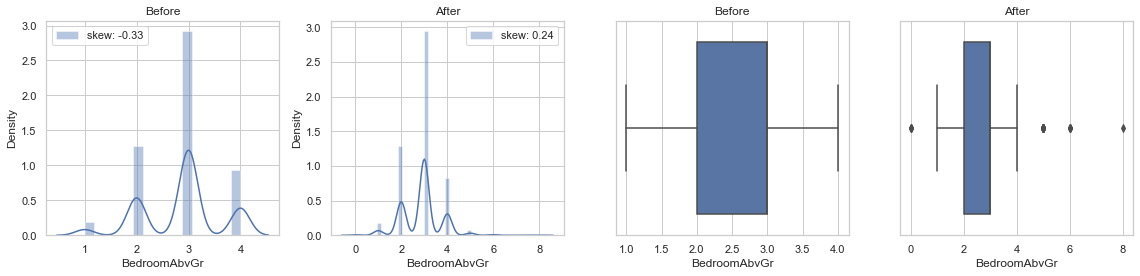

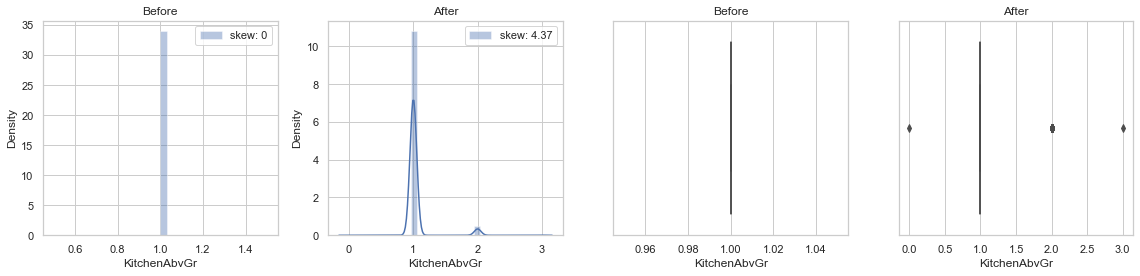

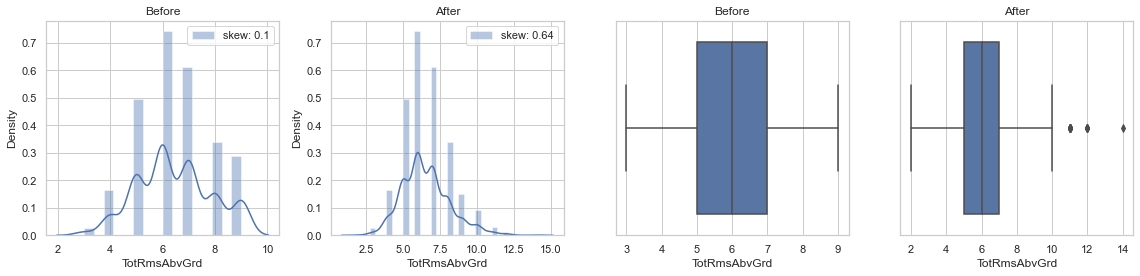

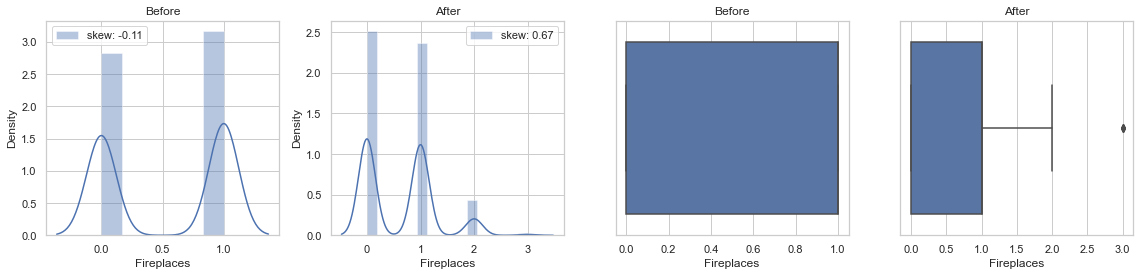

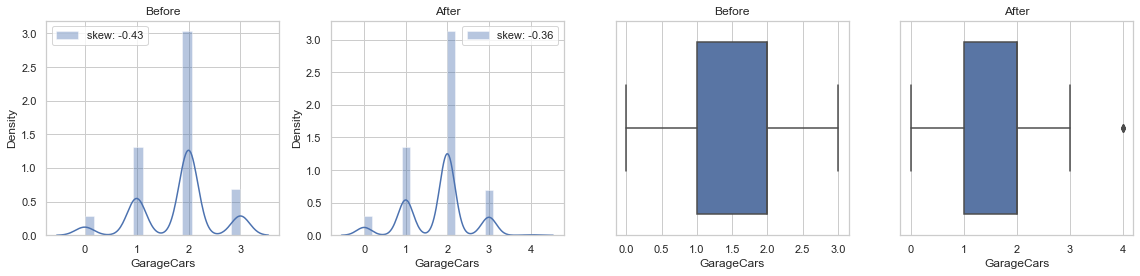

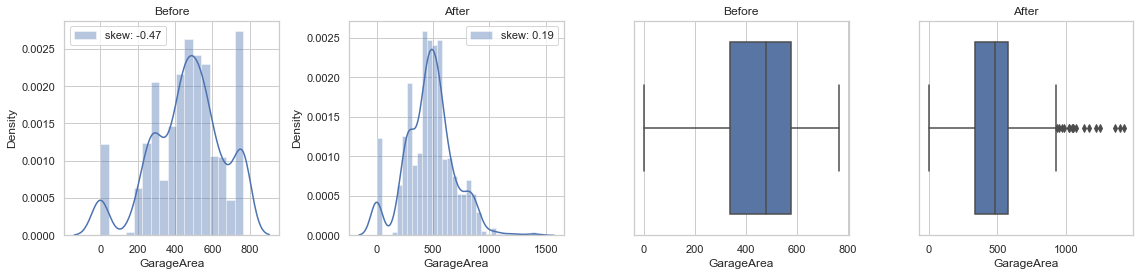

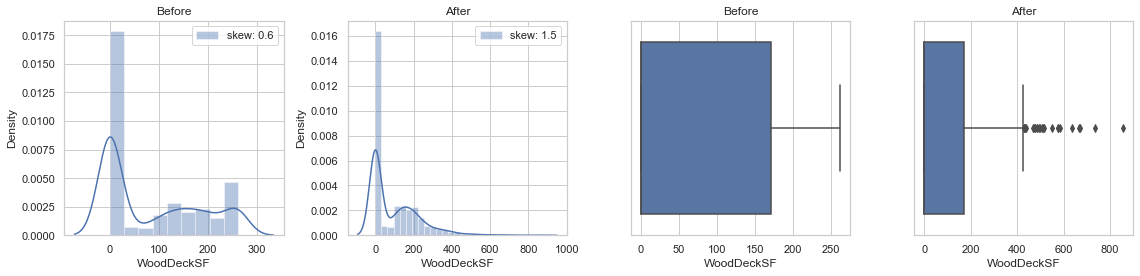

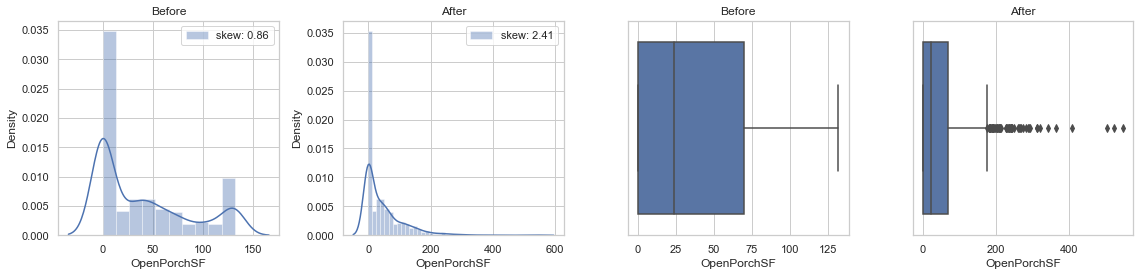

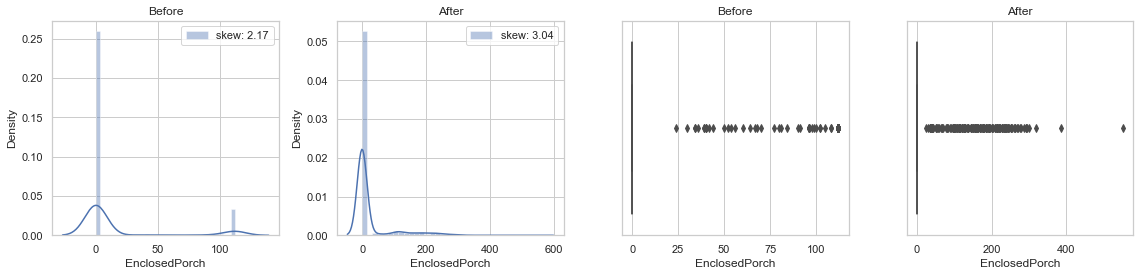

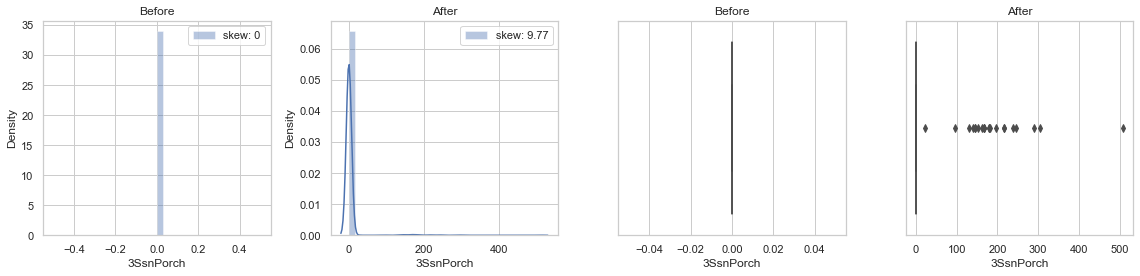

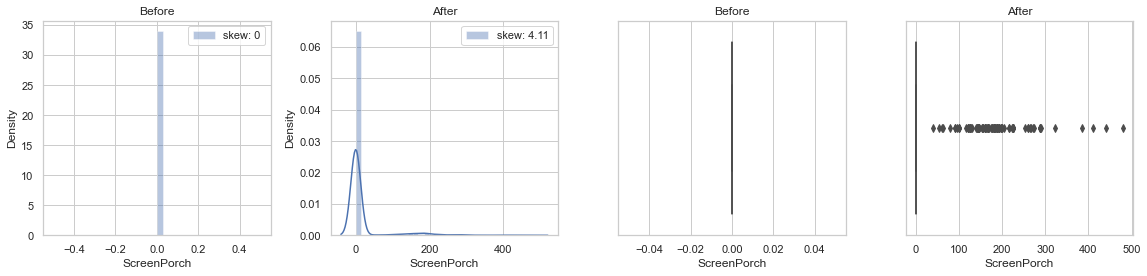

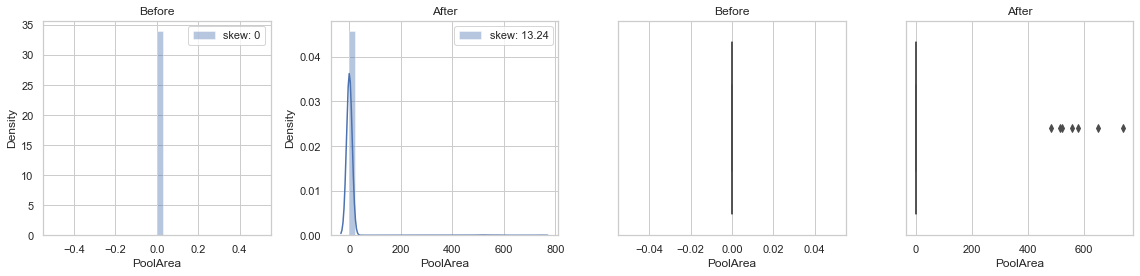

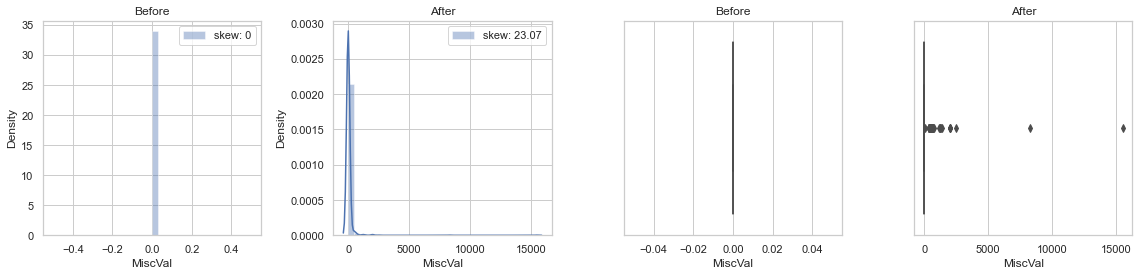

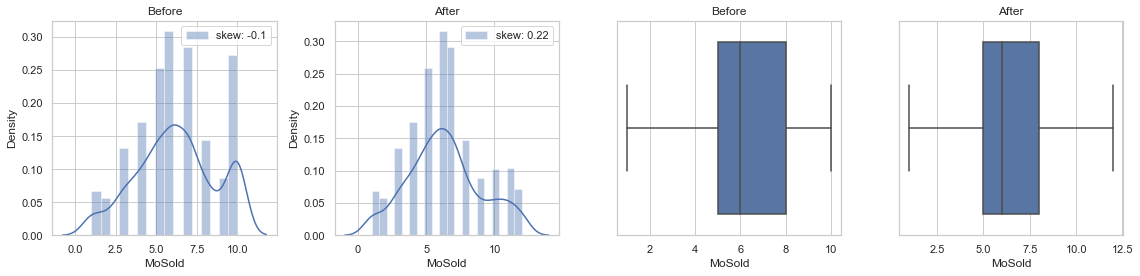

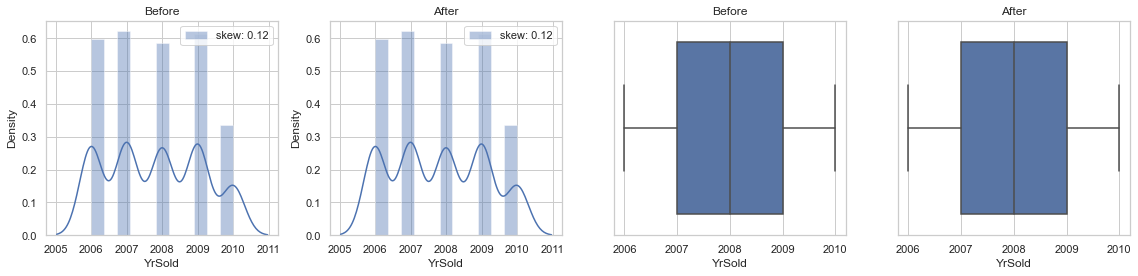

In [77]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();


# MODEL TRAINING

In [79]:
df_x=df_cap.drop(columns=['SalePrice'],axis=1)
y=df_cap['SalePrice']

In [81]:
#Scaling input variables

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# PCA (Principal component analysis)

(PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [82]:
# Importing Library
from sklearn.decomposition import PCA

In [83]:
# Let's explore the PCA
covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

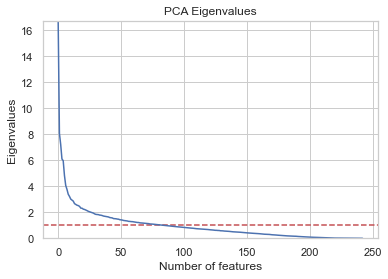

In [84]:
# Let's plot the PCA components

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

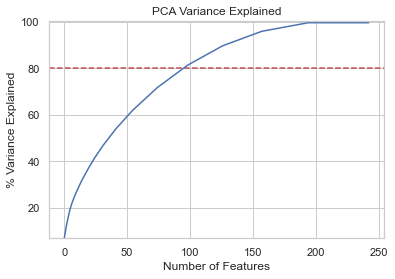

In [85]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [86]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [87]:
pd.DataFrame(data=x)

0         1          2         3         4         5         6   \
0     0.024208 -1.896765   0.132812  0.813354 -2.206518 -1.804961  1.037012   
1    -2.247519 -4.218553   2.433685  2.469491  5.428178  2.218822  4.356866   
2    -3.177178 -0.067027   0.034375 -0.530114  1.283884 -2.883945  1.488503   
3    -2.108238 -3.530582   1.216053  2.012485  1.144958  0.328449 -3.080098   
4    -3.131145 -1.375813   0.344717  1.783891  0.114498 -0.337084 -0.858273   
...        ...       ...        ...       ...       ...       ...       ...   
1163  3.795600 -2.918686  -1.471838 -0.272989 -2.503258  0.283053 -1.206085   
1164  4.015037  2.373481  10.993975 -4.930288 -3.242639  0.556724  0.472238   
1165  0.639940 -1.219558  -0.937064 -1.445259 -1.286162 -5.676994  0.845643   
1166  6.935116  2.136165  -2.252018 -2.370462  2.506755  1.337908 -0.220317   
1167 -3.748660  1.997146  -0.459624 -0.735828 -0.690068 -2.324961  1.362214   

            7         8         9   ...        80        81        82  \
0     1.146345  0.756657  1.908504  ... -0.579218  0.392934  2.338245   
1    -0.564811 -2.468453  0.703702  ... -0.657742  1.857856 -0.373285   
2     0.122534  0.736395 -1.436113  ...  0.410318  0.109337 -0.119788   
3    -0.168273  1.556181  0.787581  ... -0.483997 -0.434340 -0.182696   
4     1.615663 -0.117487 -1.216549  ...  1.170403 -0.573580 -0.010766   
...        ...       ...       ...  ...       ...       ...       ...   
1163 -0.263200  0.681302  0.521219  ... -0.365875 -1.621137 -0.102868   
1164 -1.426503 -1.053321 -0.062338  ... -0.247931  0.923902  0.145228   
1165  3.373703  1.125373  2.771990  ...  1.194097  1.424515  2.565820   
1166 -0.663153  1.002534 -0.602081  ...  0.608225 -0.860048  2.854546   
1167 -1.769037 -0.703751 -0.561516  ... -0.018955  0.655434 -0.071788   

            83        84        85        86        87        88        89  
0    -0.323608 -0.691218 -0.451686 -0.230454 -0.860090 -0.332388  0.581720  
1    -1.219539 -0.098217  1.584645  0.837189 -1.275089 -1.133574  0.833021  
2    -0.890791  0.378380 -0.578065 -1.436444 -0.570319 -0.265571  0.733855  
3     0.818289  0.050748  0.490320  0.269997  0.034132  0.573549 -0.643914  
4    -0.338907  0.911055  0.292967 -0.599568 -0.953050  0.840036 -0.296360  
...        ...       ...       ...       ...       ...       ...       ...  
1163 -1.142572  0.909666 -0.755041 -0.461071 -0.000048  0.998464 -0.116638  
1164  0.042693 -1.164756  0.539525  0.449157 -0.151154  1.453940 -0.834210  
1165  0.323936 -0.144513 -0.906743 -0.252902 -1.285189 -2.269432  2.165484  
1166  0.034045 -0.267490 -0.897319 -0.025690 -1.095242  1.123857 -0.612767  
1167 -1.074344  0.419530 -0.766794 -0.150831 -0.544470 -0.675288  0.340090  

[1168 rows x 90 columns]

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [89]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 98 is 0.8508205943756013


In [90]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

In [91]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8345157967279193
Error:
Mean absolute error: 20851.4557498892
Mean squared error: 1020886273.8096296
Root Mean Squared Error: 31951.310987338682
r2_score: 0.84442611590973
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 33725.517094017094
Mean squared error: 3124820483.405983
Root Mean Squared Error: 55900.09376920564
r2_score: 0.5238054696590454
*************************************************************


score of KNeighborsRegressor() is: 0.7930814817688395
Error:
Mean absolute error: 26347.488034188034
Mean squared error: 1609419715.6511111
Root Mean Squared Error: 40117.57365109599
r2_score: 0.7547389139037521
*************************************************************


score of SVR() is: -0.045683794426405244
Error:
Mean absolute error: 58256.303019086845
Mean squared error: 6883577680.125092
Root Mean Squared Error: 82967.32899235151
r2_score: -0.0489953128

# GradientBoostingRegressor() is giving us minimum Rmse score so we choose it as our final model.

# Hyperparameter tuning

In [92]:
# Let's Use the GridSearchCV to find the best parameters in GradientBoostingRegressor()

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
GBR=GradientBoostingRegressor()

GBR=GridSearchCV(GBR,parameters,n_jobs=-1)
GBR.fit(x,y)
print(GBR.best_params_)

{'alpha': 0.3}


In [93]:
# Let's use the Gradient Boosting Regressor with its best parameters

gbr=GradientBoostingRegressor(alpha=0.3)
gbr.fit(x_train,y_train)
print('Score:',gbr.score(x_train,y_train))
y_pred=gbr.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.9734329800239208


Mean absolute error: 20255.609950588325
Mean squared error: 871194958.9449295
Root Mean Squared error: 29516.011907859935


r2_score: 0.8672377256507222




In [94]:
# Let's Cross validate the Gradient Boosting Regressor  model

score=cross_val_score(gbr,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.81678859 0.81721817 0.89483907 0.79341292 0.87105111 0.64702352
 0.83792522 0.85838462 0.85455394 0.85875599]
Mean Score: 0.8249953161483148
Standard deviation: 0.06564605893967543


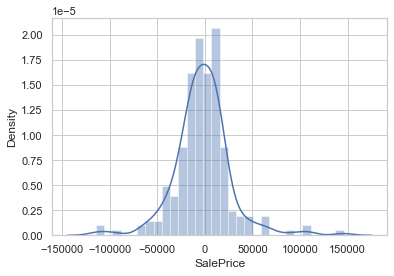

In [95]:
# Let's plot the distribution plot and the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

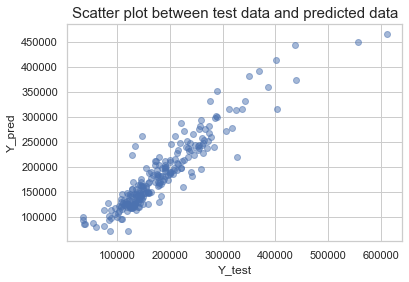

In [96]:
# Let' plot the Scatter plot between test data and predicted data

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

# Let's Test our TEST DataSet

In [103]:
# Let's load the dataset

df_test=pd.read_csv("Housing_data_test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

# Let's apply all the changes as we did in our train dataset

In [104]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
df_test[columns] = df_test[columns].fillna('NA')

#filling missing values in MasVnrType with None
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(),inplace=True)

In [105]:
#Encoding categorical columns

categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

df_test = pd.get_dummies(df_test, columns = categorical_colss, drop_first=True)

In [106]:
df_test.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [107]:
df_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  PavedDrive_P  \
0            2006       200.0        1249           0  ...             0   
1            1984         0.0        1036           0  ...             0   
2            2001         0.0           0           0  ...             0   
3            1950         0.0         275           0  ...             0   
4            2007        74.0           0           0  ...             0   
..            ...         ...         ...         ...  ...           ...   
287          2007       468.0          33           0  ...             0   
288          1995         0.0         686           0  ...             0   
289          1970       180.0         578           0  ...             0   
290          1950         0.0         399           0  ...             0   
291          1973       408.0         309           0  ...             0   

     PavedDrive_Y  SaleType_CWD  SaleType_ConLD  SaleType_ConLw  SaleType_New  \
0               1             0               0               0             0   
1               1             0               0               0             0   
2               1             0               0               0             0   
3               1             0               0               0             0   
4               1             0               0               0             0   
..            ...           ...             ...             ...           ...   
287             1             0               0               0             0   
288             1             0               0               0             0   
289             1             0               0               0             0   
290             1             0               0               0             0   
291             1             0               0               0             0   

     SaleType_WD  SaleCondition_Family  SaleCondition_Normal  \
0              1                     0                     1   
1              0                     0                     0   
2              1                     0                     1   
3              1                     0                     1   
4              1                     0                     1   
..           ...                   ...                   ...   
287            1                     0                     1   
288            1                     0                     1   
289            1                     0                     1   
290            1                     0                     1   
291            1                     0                     1   

     SaleCondition_Partial  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
287                      0  
288                      0  
289                      0  
290                      0  
291                      0  

[292 rows x 213 columns]

In [108]:
# Let's make a copy of our test dataset
housing_cap=df_test.copy()

In [109]:
def percentile_capping(df_test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df_test[col], limits=(from_low_end, from_high_end), inplace=True)

In [110]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [111]:
percentile_capping(housing_cap, features, 0.01, 0.10)
housing_cap.shape

(292, 213)

In [113]:
# Let's Scale the input variables

sc=StandardScaler()
x1=sc.fit_transform(df_test)
x1=pd.DataFrame(x1,columns=df_test.columns)

In [115]:
# Let's check the PCA

covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

In [117]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [118]:
pd.DataFrame(data=x1)

0         1         2         3         4         5         6   \
0   -7.230157  2.222011  1.496484  4.043805 -1.655639 -0.938563  1.229618   
1   -3.072242 -0.239101  0.445989 -0.207622 -2.681405  2.294892  0.164982   
2   -4.352944  1.294936 -0.698007  0.687803 -1.170315 -1.543662 -1.602387   
3    2.364058 -1.528634  0.738506  0.329316  3.287338 -1.342443  0.537068   
4   -4.680780  2.076735 -1.818632 -0.837280  3.532847 -1.361782  0.684049   
..        ...       ...       ...       ...       ...       ...       ...   
287 -5.088818  1.288022 -0.952124  0.164966 -1.297198 -1.665925 -0.964441   
288 -0.163327 -0.632468 -0.353900 -1.653287 -2.521442 -0.312983  0.007369   
289  0.975206 -2.648628  2.088382  0.749168 -1.112006  0.604258 -0.894954   
290  2.728598 -1.949752 -0.625144 -0.841542  2.141371 -0.728874  2.233374   
291  3.768191 -2.646545 -0.785820 -5.308845  1.306190  3.236218  1.069471   

           7         8         9   ...        80        81        82  \
0   -0.832792 -0.930155  1.453895  ... -0.221739 -0.384322 -0.119743   
1   -1.183889 -0.636800  1.014300  ...  1.303441  1.387335  0.834533   
2    1.987478  0.499538 -0.524646  ... -0.743873  0.475766 -0.307787   
3   -1.117912 -1.383874  1.915644  ...  1.260086  0.489879  0.440977   
4    1.214704  0.471511 -0.417898  ...  1.254937 -0.473327  0.330450   
..        ...       ...       ...  ...       ...       ...       ...   
287  0.188912  0.089998 -0.857465  ...  0.156536  1.040464  0.304121   
288  2.832698 -0.715647 -0.503165  ...  0.020103  0.818470  0.315827   
289  0.607123 -2.172489  0.161085  ...  0.594773 -0.294684  0.339690   
290 -2.913802  1.798795  0.819127  ...  1.282138 -0.643407 -0.243890   
291 -3.256347 -1.592740  0.824843  ...  0.888730  0.112318 -0.769941   

           83        84        85        86        87        88        89  
0    0.065731  0.333320  1.367193  1.021135  0.324552  0.742920 -0.689099  
1   -1.279134  0.657967  3.192575  0.465731  0.816589  0.631655 -0.987268  
2   -0.053860  0.470665 -0.408413 -0.678701  0.292220 -0.459685 -1.135013  
3   -1.126095 -2.048535 -1.410642 -0.410009  0.540840  0.252786 -0.910837  
4   -0.546260 -0.008829 -0.011727  1.058548 -1.106646  0.829515  1.271844  
..        ...       ...       ...       ...       ...       ...       ...  
287 -0.124308  0.233956 -0.357988  0.087849 -0.066396  1.037489  1.241831  
288  0.323232  0.468091 -0.468859 -0.590833 -1.284685  1.123559  0.488292  
289  0.144252  0.325518  1.017870 -0.596642 -1.183449  0.498176 -0.866512  
290 -0.110696 -2.028597  0.934200 -0.178358 -0.659676  0.556940  0.280053  
291 -1.041195 -0.227443  0.411712  0.108631 -0.381900 -0.648069 -0.655092  

[292 rows x 90 columns]

In [119]:
# Let's save our best model

import joblib
joblib.dump(gbr,'Housing_Project.pkl')

['Housing_Project.pkl']

In [121]:
# Let's load our save model

model=joblib.load('Housing_Project.pkl')

In [124]:
# Let's Test our save model

import sys
nums= model[0].predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[257105.36618312 175699.14937218 238056.15831672 170033.71755272
 294922.11139432   1301.56611387 134061.84515682 246376.09304973
 268206.24051317 167066.49925354  17040.39360564 155248.08341345
 145437.01295006 212503.56971526 280352.82060364 161801.73539003
 110366.96522734 145405.86840161 221035.42394643 245425.56195771
 158802.88770911 178316.44542011 188075.1483119   14970.54283167
  89602.91253564 159696.02914582 233639.87396948 163544.92142774
 217174.0378451   36977.14894795 156383.92006927 209633.42050446
 228654.59963372 180934.66427062  87638.31145449 250781.78204208
 278497.41818242 106419.14309486 252672.19253531 108627.17546759
  89268.15606851 294409.83076385 260403.3462817  206622.68840768
 171165.52243067  90187.22697619 108613.41749916 -61177.00498308
 229851.72335121 221374.80661591 165555.18624128 172083.94593233
 100838.9058597   -6824.85767371 302116.99363097 135360.44449426
 120014.22332551 240709.15052084 156748.78728962 255337.97379033
  74685.4552472  261415.0